<a href="https://colab.research.google.com/github/rayane2907/GANs/blob/main/GAN_Model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the original dataset


In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")

Mounted at /content/drive


## Importing the images

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/machine_learning/Newdata/Newdata')

## *Checking the size of one image in the dataset*

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import save_image
from matplotlib import pyplot as plt
from PIL import Image

image_path = '/content/drive/MyDrive/Colab Notebooks/machine_learning/Newdata/Newdata/Test/Shape1/cow8-022-180.png'
img = Image.open(image_path)

# Print the size of the image
print(f"Size of the image: {img.size} (width, height)")

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

Size of the image: (256, 256) (width, height)


In [ ]:
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.autograd.variable import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import numpy as np
from torchvision.io import read_image

## *Importing CUDA*
CUDA (Compute Unified Device Architecture) by NVIDIA is a parallel computing platform and application programming interface model. It enables developers to use NVIDIA GPUs for general-purpose processing, accelerating tasks like scientific simulations and deep learning, by harnessing the power of parallel computing on graphics processing units (GPUs)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## *Creating our custom dataset class*
Our data set is located on google drive file('MyDrive/Colab Notebooks/machine_learning/Newdata') and in order to fetch the images from this file and label them ,we define a new class "CustomImageDataset" ,we give the path file to our cow's and Horse's images .

In [ ]:
# we created our custom dataset class to import the cow and horse images
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_labels = None
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        # self.classes=os.listdir(img_dir)

    def __len__(self):
        return len(self.createAnnotFile(self.img_dir))
    def createAnnotFile(self, img_dir):
      self.img_labels=[]
      # for cldir in os.listdir(img_dir):
      n= len(os.listdir(img_dir))
      self.img_labels= [1]*n if os.path.split(self.img_dir)[-1]=='Cow' else [0]*n
      return self.img_labels

    def __getitem__(self, idx):
        img_names=[]
        img_paths=[]
        self.createAnnotFile(self.img_dir)
        # for lab in self.classes:
        img_paths += [os.path.join(self.img_dir, img_name) for img_name in os.listdir(self.img_dir)]
        image = read_image(img_paths[idx]).type(torch.uint8)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
transform1 = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((64,64)),
            transforms.ToTensor(),
            # transforms.Normalize((.5, .5, .5), (.5, .5, .5))
            ])

batch_size = 1

CowTrainPath=os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', 'machine_learning', 'Newdata', 'Newdata', 'Train', 'Cow')
CowTestPath = os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', 'machine_learning', 'Newdata', 'Newdata', 'Test', 'Shape1')

HorseTrainPath=os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', 'machine_learning', 'Newdata', 'Newdata', 'Train', 'Horse')
HorseTestPath=os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', 'machine_learning', 'Newdata', 'Newdata', 'Test', 'Shape2')

CowTrainSet=CustomImageDataset(CowTrainPath,transform=transform1, target_transform=None)
HorseTrainSet=CustomImageDataset(HorseTrainPath,transform=transform1, target_transform=None)
Cow_loader = torch.utils.data.DataLoader(CowTrainSet, batch_size=batch_size,shuffle=True, num_workers=2)
Horse_loader = torch.utils.data.DataLoader(HorseTrainSet, batch_size=batch_size,shuffle=True, num_workers=2)

## *Creating a Transformer*

The transformer plays a crucial role in preprocessing for a GAN. It standardizes image dimensions, enhances diversity through random inversion, and converts between PIL images and tensors, ensuring compatibility and augmenting the dataset for improved GAN training.

In [ ]:
transform = transforms.Compose([
            transforms.ToPILImage(), #converts a tensor to a PIL (Python Imaging Library) image.
            transforms.Resize((227,227)),#Resizing the image to (64 by 64 pixels)
            transforms.CenterCrop(size=(180, 180)),
            transforms.RandomInvert(p=0.5),
            transforms.ToTensor(), #converts PIL image to a tensor
            ])

In [ ]:
# check the size of the batches
for batch_idx, data in enumerate(Horse_loader,0):
  images, labels = data
  print(images.shape)
  print(labels.shape)
  break

torch.Size([1, 3, 64, 64])
torch.Size([1])


## *Visualizing sample images*

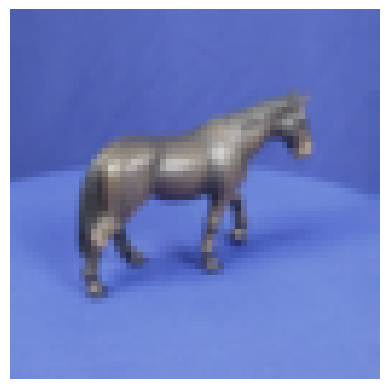

In [ ]:
# visualize sample images
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()


# get some random training images a whole batch
dataiter = iter(Horse_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images, nrow= 16))

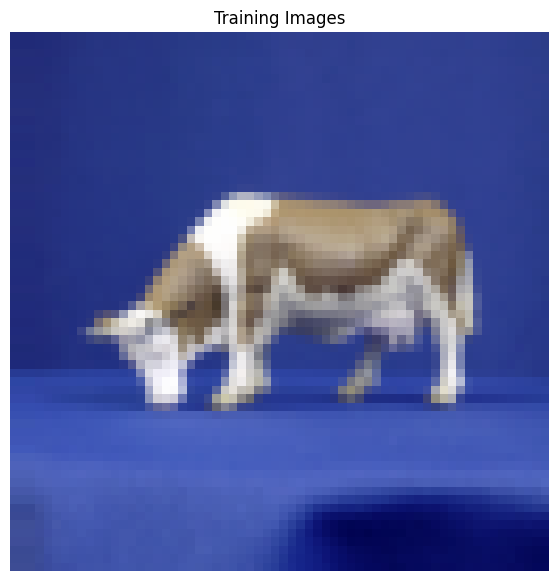

In [ ]:
import numpy as np
import torchvision.utils as vutils
# Plot some training images
real_batch = next(iter(Cow_loader))
plt.figure(figsize=(7,7))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

## *Visualizing the images with labels*

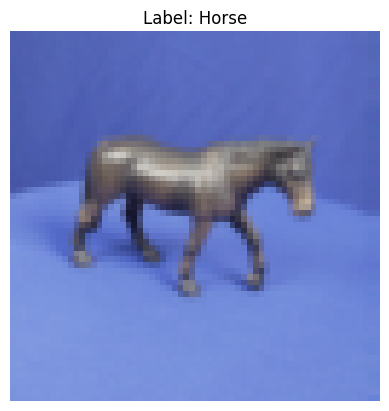

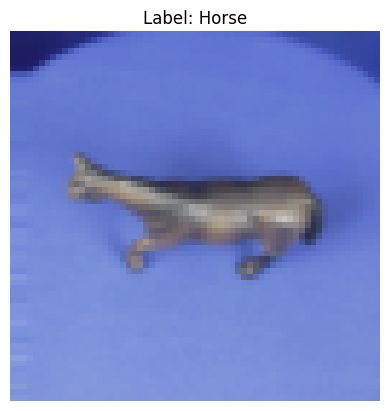

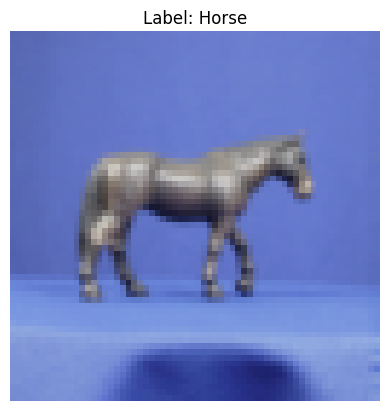

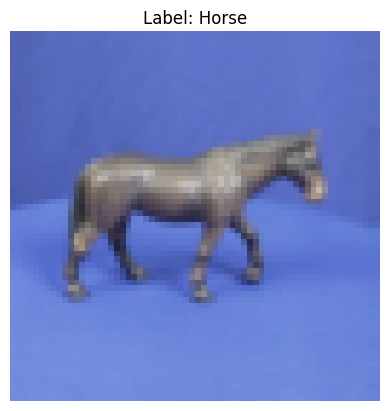

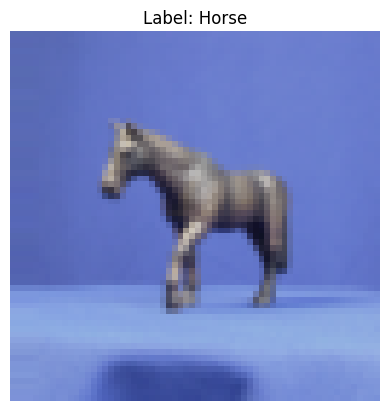

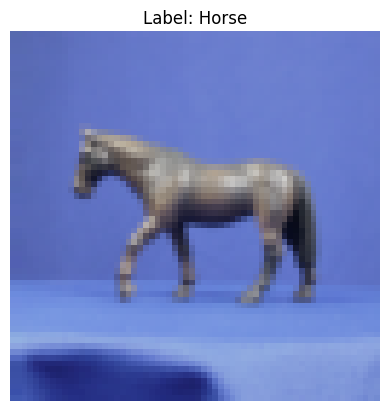

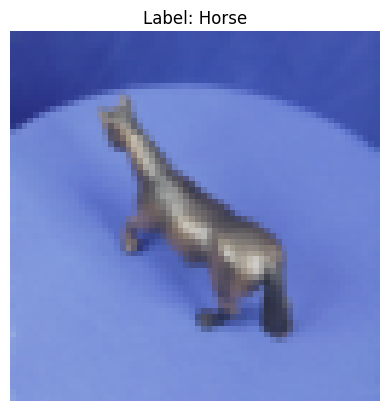

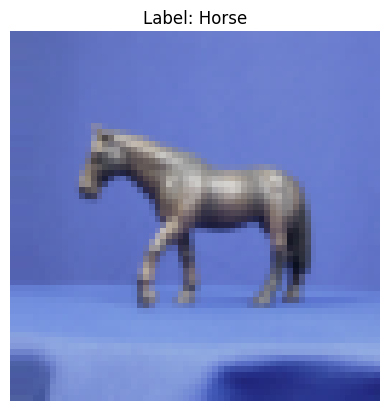

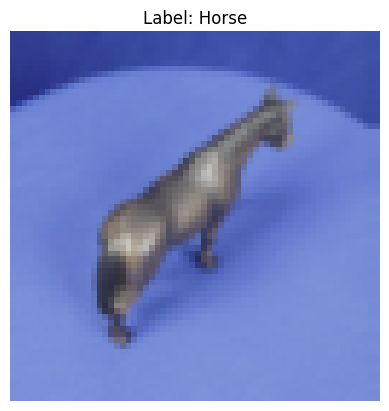

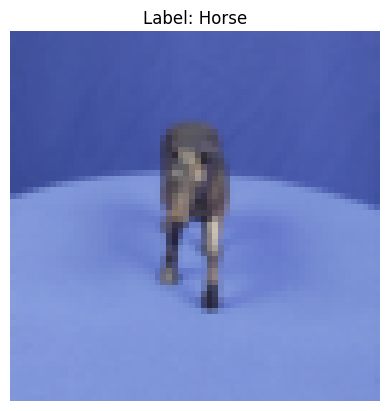

In [ ]:
# Define a function to display an image and its label
def show_image(img, label):
    plt.imshow(img.permute(1, 2, 0)) #rearranges the dimensions of the tensor
    plt.title("Label: {}".format("Cow" if label == 1 else "Horse"))
    plt.axis('off')
    plt.show()

# Display the first 10 images in the dataset of the Horses
for i in range(10):
    img, label = HorseTrainSet[i]
    show_image(img, label)

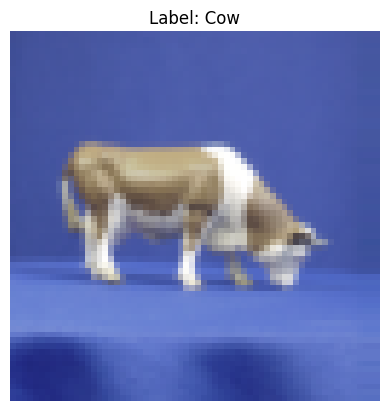

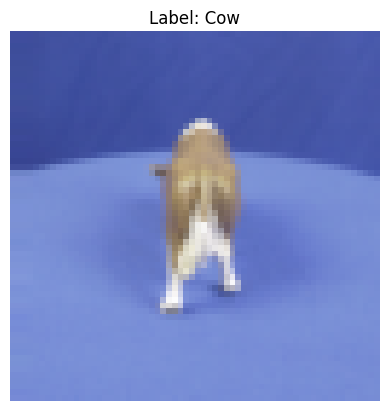

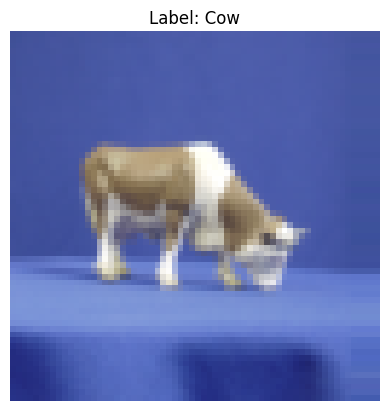

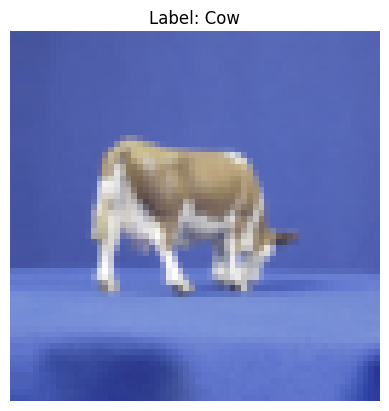

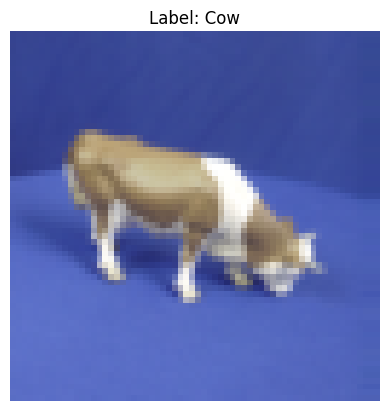

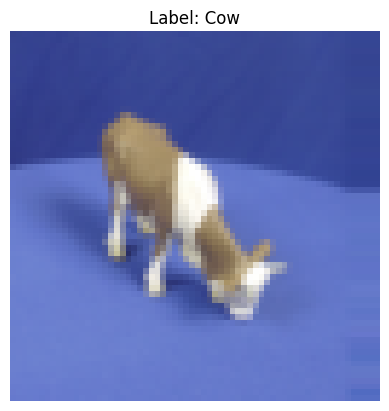

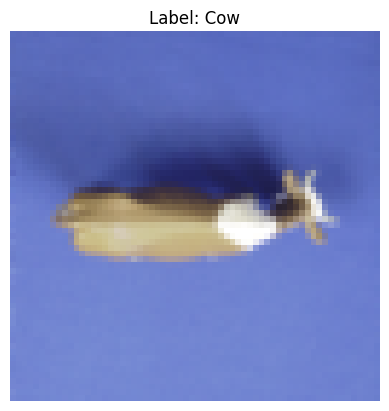

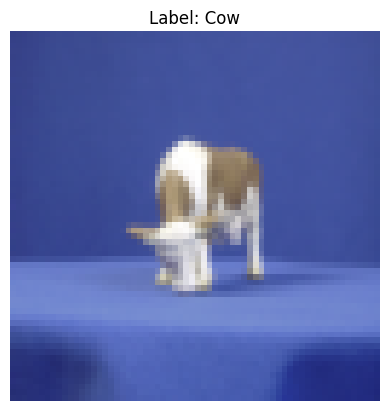

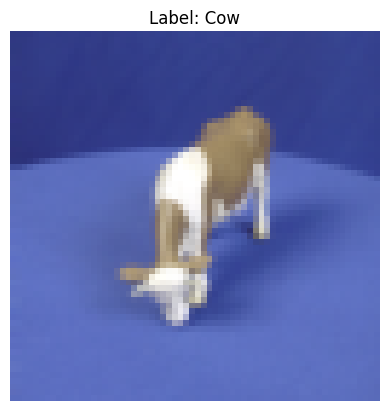

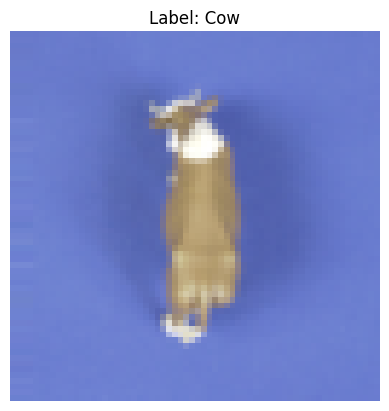

In [ ]:
# Display the first 10 images in the dataset of the Cows
for i in range(10):
    img, label = CowTrainSet[i]
    show_image(img, label)

## *The CNN Classifier*

The provided neural network class, *MyNeuralNetwork*, is a convolutional neural network (CNN) designed for image classification tasks. It consists of convolutional layers, max-pooling operations, dropout layers for regularization, and fully connected layers. The network architecture processes input images through convolutional and pooling layers, applies dropout for regularization, and ends with fully connected layers for classification. The final layer uses the softmax activation function to produce class probabilities. The network is trained to classify images into two classes, presumably 'Cow' or 'Horse', making it suitable for binary image classification tasks. Regularization techniques like dropout enhance its generalization capability.

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #Convolution Neural Network
        self.conv1 = nn.Conv2d(3,16,(3,3)) #the input is an RGB image of dim=3  ,the output will be : 62x62x16
        self.pool = nn.MaxPool2d(2) #we do a max pooling of 2x2 ,the output will be : 31x31x16
        self.conv2= nn.Conv2d(16,32,(2,2)) #the output will be : 30x30x64
        self.dropout = nn.Dropout(0.5)
        self.pool2 = nn.MaxPool2d(2)  #we do a max pooling of 2x2 ,the output will be : 15x15x64
        self.conv3= nn.Conv2d(32,8,(2,2))#the output will be : 14x14x32
        self.Relu = nn.ReLU() #an activation function
        self.FC1 = nn.Linear(1352,800 )#Artificial Neural Network of 1352 neurons conected to 800 neurons
        self.FC2 = nn.Linear(800,200 )#ANN of 800 neurons conected to 200 neurons
        self.dropout2 = nn.Dropout(0.15) # (0.15) is the probability of setting a unit to 0. During training
        self.FC3 = nn.Linear(526,126 )
        self.FC4 = nn.Linear(200,2)#the last flatten layer with output of 2 (Cow or Horse)

   #defining the forward pass of the network
    def forward(self, x):
        x = self.Relu(self.conv1(x))
        x = self.pool(x)
        x = self.Relu(self.conv2(x))
        x = self.dropout(x)
        x = self.pool2(x)
        x = self.Relu(self.conv3(x))
        x = self.FC1(x.view(-1,1352)) #Reshape
        x = self.dropout2(x)
        x = self.Relu(self.FC2(x))
        x = self.dropout(x)
       # x= self.Relu(self.FC3(x))
        x = nn.functional.softmax(self.FC4(x), dim=1)#softmax is an activation function ,usually is used at the output layer
        return x
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,(4,4))
        self.pool = nn.MaxPool2d(4)
        self.dropout = nn.Dropout(0.2)
        self.conv2= nn.Conv2d(32,8,(2,2))
        self.pool2 = nn.MaxPool2d(2)
        self.Relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.FC1 = nn.Linear(392,176)
        self.FC2 = nn.Linear(176,2)


    def forward(self, x):
        x = self.Relu(self.conv1(x))
        x = self.dropout(x)
        x = self.pool(x)
        x = self.Relu(self.conv2(x))
        x = self.dropout(x)
        x = self.pool2(x)
        x = self.FC1(x.view(-1,392)) #Reshape
        x = nn.functional.softmax(self.FC2(x), dim=1)
        return x

In [ ]:
#we instantiate the class "MyNeuralNetwork"
Mymodel = MyNeuralNetwork()
#send it to the GPU
Mymodel.to(device)
#Print the architecture of the model
print(Mymodel)

MyNeuralNetwork(
  (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(32, 8, kernel_size=(2, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (FC1): Linear(in_features=392, out_features=176, bias=True)
  (FC2): Linear(in_features=176, out_features=2, bias=True)
)


## *Hyperparameters*

In [ ]:
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64
# Number of channels in the training images. For color images this is 3
nc = 3
# Size of z latent vector (i.e. size of generator input)
nz = 100
# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64
# Number of training epochs
num_epochs = 5
# Number of GPUs available.
ngpu = 1

## *Discriminator*

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, input):
          return self.main(input)
discriminator = Discriminator(ngpu)

## *Generator*


In [ ]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )
    def forward(self, input):
          return self.main(input)
generator = Generator(ngpu)

  ## *Weights initialization*
  The custom weight initialization function (weights_init) for a Generative Adversarial Network (GAN). It initializes the weights of convolutional layers with a normal distribution (mean=0, std=0.02) and the weights of batch normalization layers with normal distribution (mean=1.0, std=0.02), while setting the bias of batch normalization layers to zero. Proper weight initialization can contribute to the stability and effectiveness of training GANs.

In [ ]:
# custom weights initialization called on Generator and Discriminator
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

## *The contact between Generator and Discriminator*

In [ ]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
# Create the generator
generator = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    generator = nn.DataParallel(generator, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
generator.apply(weights_init)

# Print the model
print(generator)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [ ]:
# Create the Discriminator
discriminator = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    discriminator = nn.DataParallel(discriminator, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
discriminator.apply(weights_init)

# Print the model
print(discriminator)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


## *Displaying an image and its noise through the Generator*

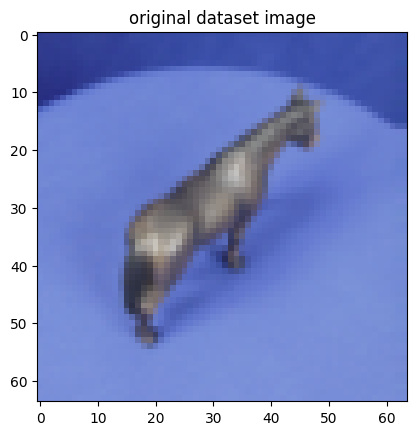

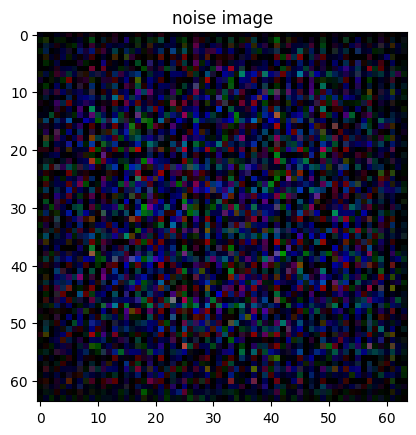

In [ ]:
from torchvision.utils import make_grid
%matplotlib inline

# Display images
img,_=next(iter((Horse_loader)))
plt.figure()
plt.imshow(img[0].permute(1,2,0))
plt.title('original dataset image')
plt.figure()
img=generator(torch.randn(1, 100,1,1).to(device))[0]
img=img.cpu().detach().squeeze().permute(1,2,0).numpy()
plt.imshow(img)
plt.title('noise image')
plt.show()

## *Optimization and BCE Loss*
The goal is to minimize this loss during training. BCE loss penalizes predictions that diverge from the true labels, encouraging the model to make accurate predictions for binary classification tasks.

In [ ]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = optim.Adam(generator.parameters(), lr=0.0003, betas=(0.5, 0.999))
loss = nn.BCELoss()

## *Training the GAN*

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

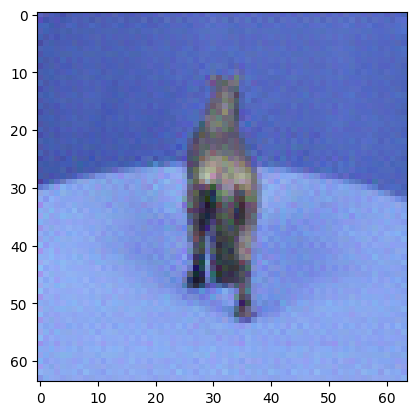

Epoch:  902


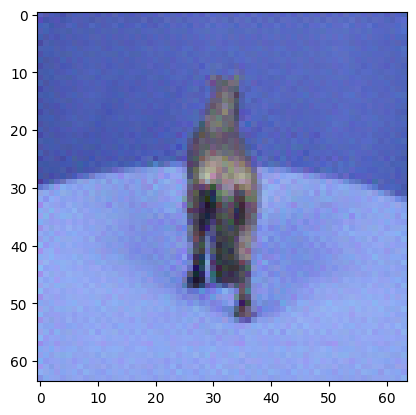

Epoch:  903


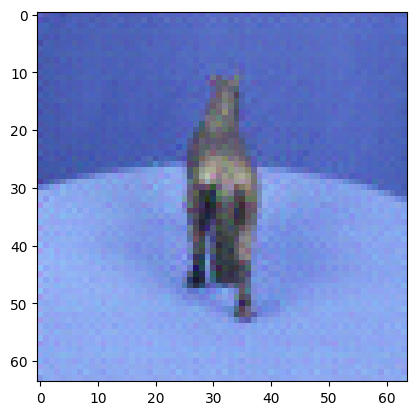

Epoch:  904


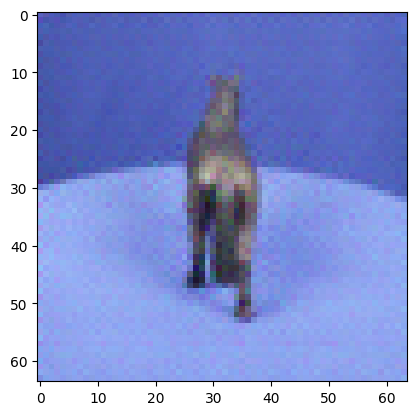

Epoch:  905


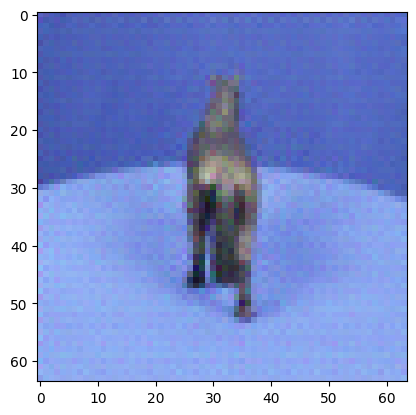

Epoch:  906


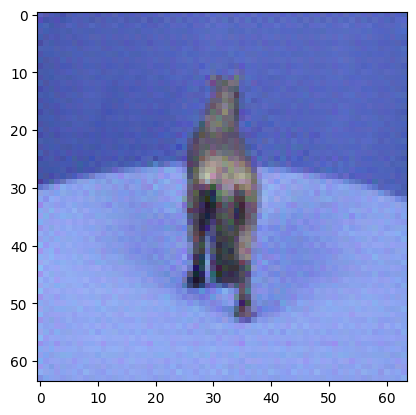

Epoch:  907


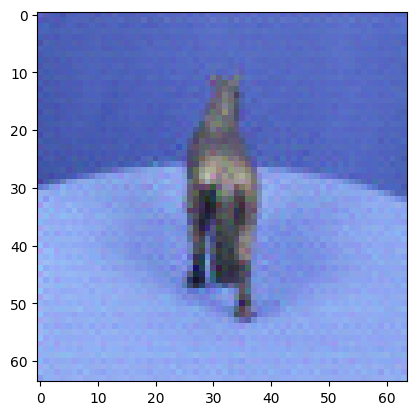

Epoch:  908


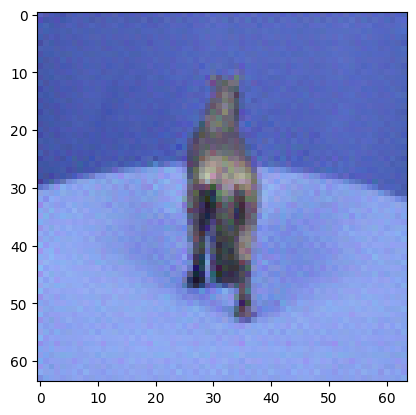

Epoch:  909


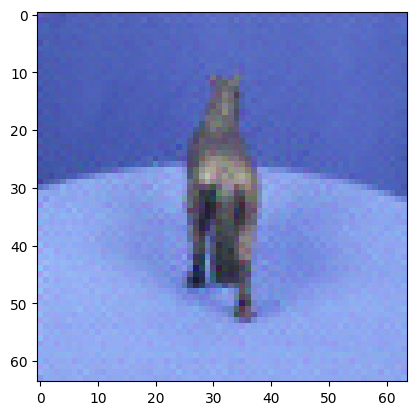

Epoch:  910


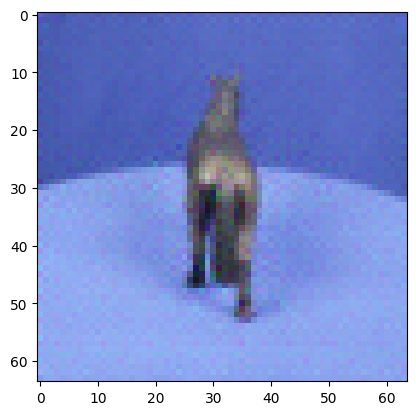

Epoch:  911


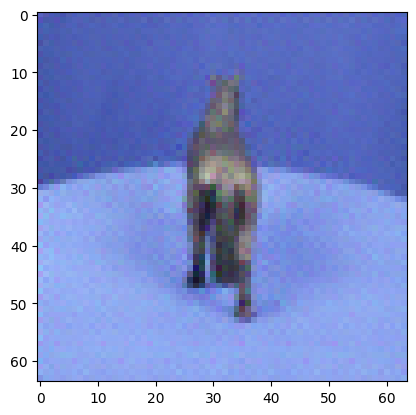

Epoch:  912


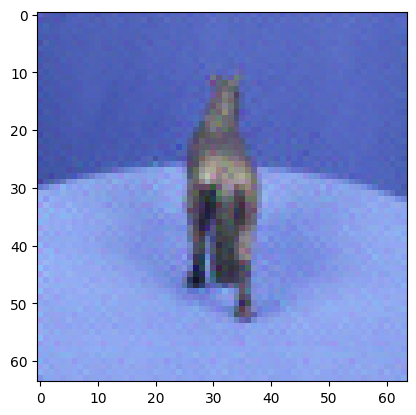

Epoch:  913


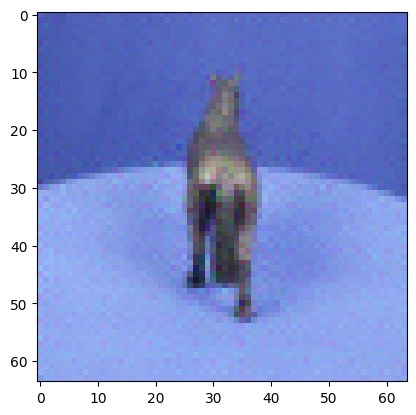

Epoch:  914


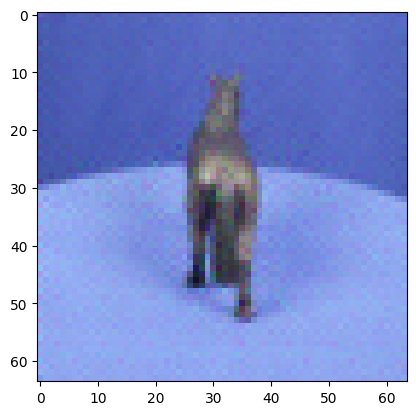

Epoch:  915


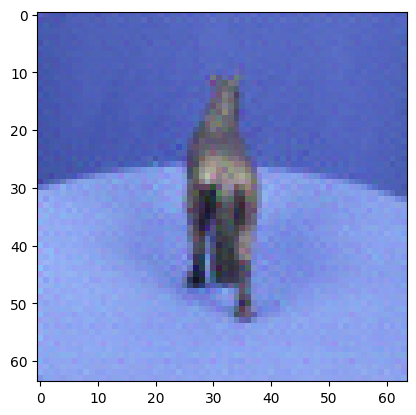

Epoch:  916


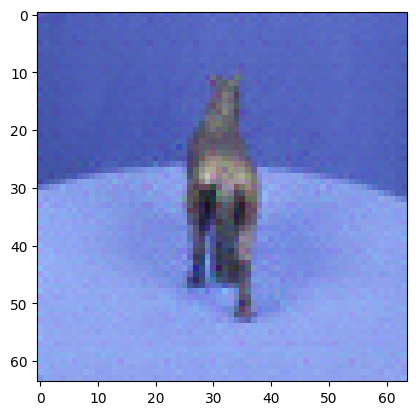

Epoch:  917


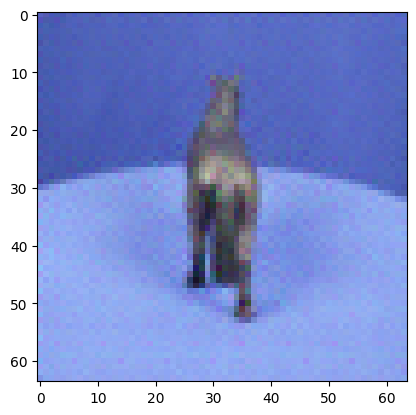

Epoch:  918


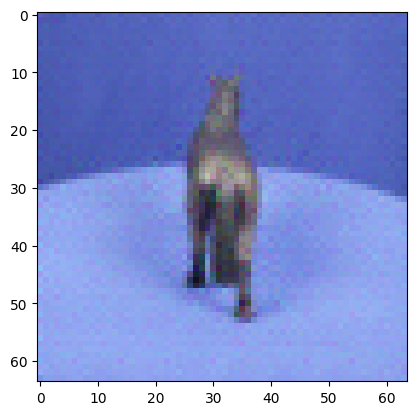

Epoch:  919


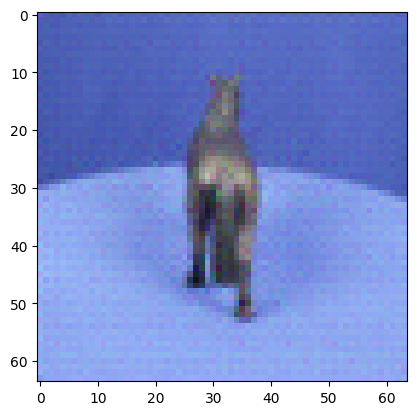

Epoch:  920


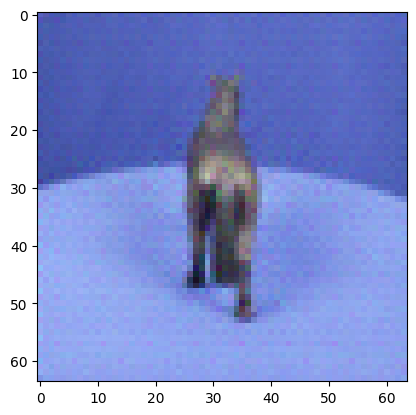

Epoch:  921


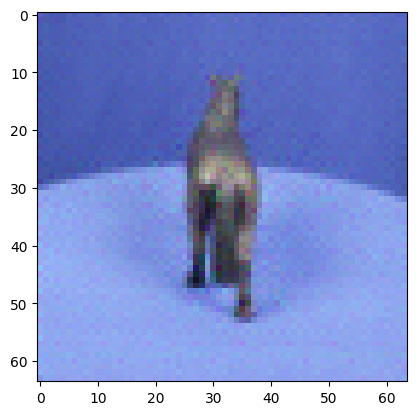

Epoch:  922


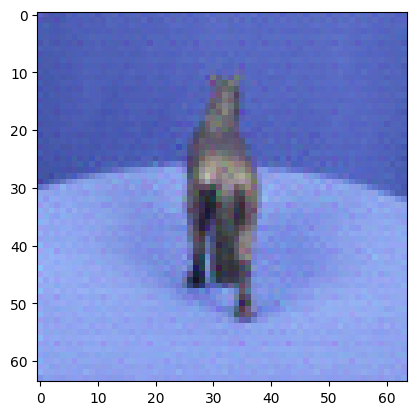

Epoch:  923


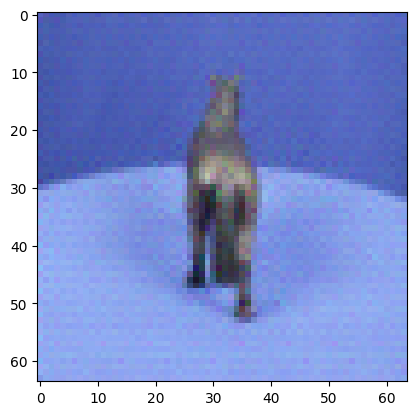

Epoch:  924


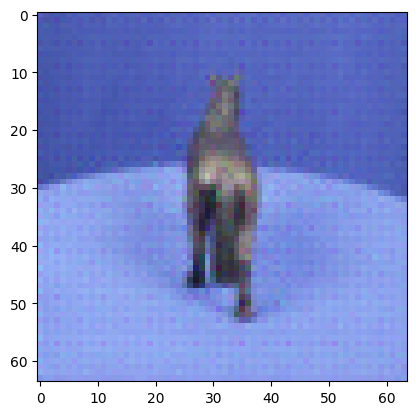

Epoch:  925


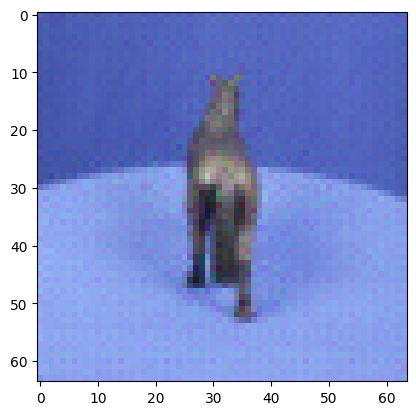

Epoch:  926


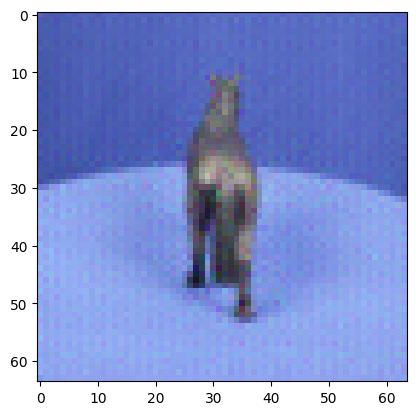

Epoch:  927


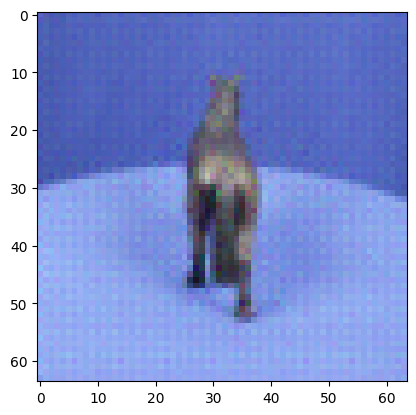

Epoch:  928


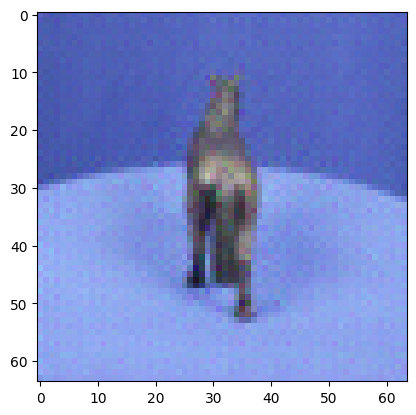

Epoch:  929


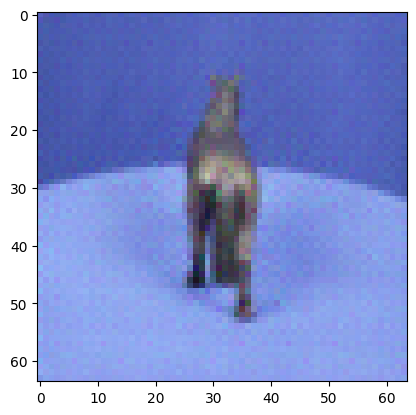

Epoch:  930


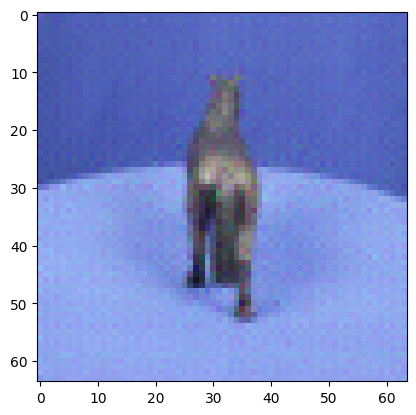

Epoch:  931


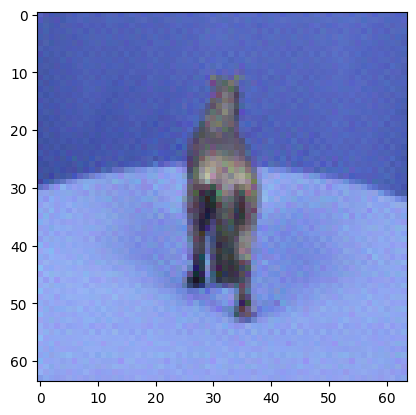

Epoch:  932


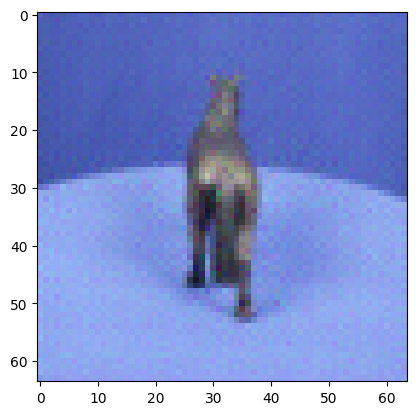

Epoch:  933


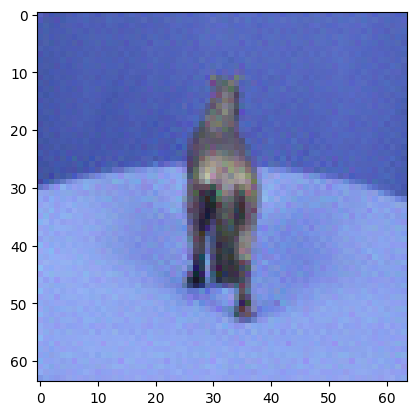

Epoch:  934


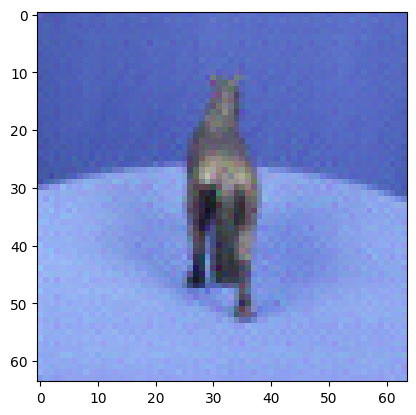

Epoch:  935


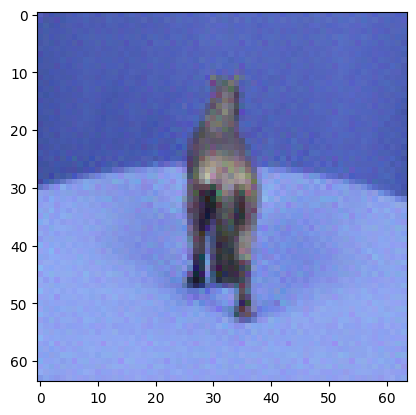

Epoch:  936


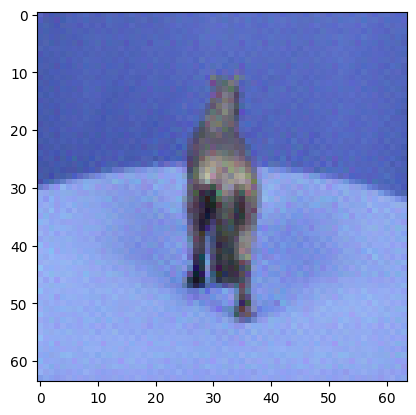

Epoch:  937


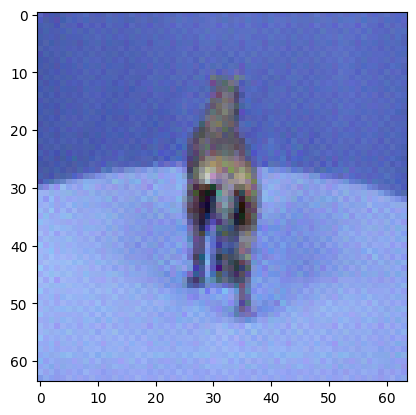

Epoch:  938


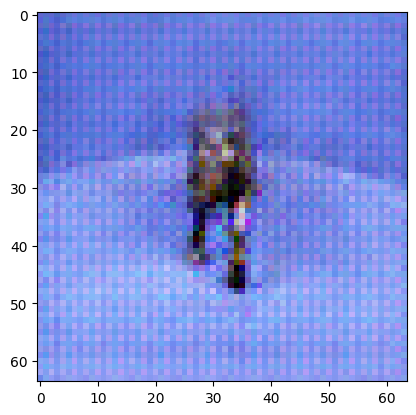

Epoch:  939


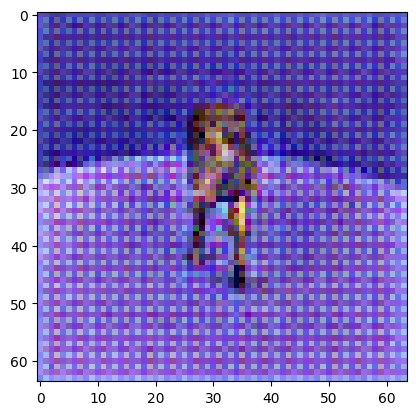

Epoch:  940


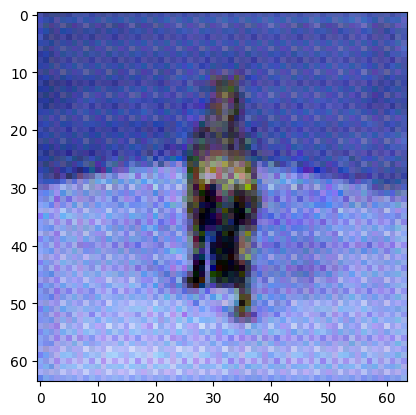

Epoch:  941


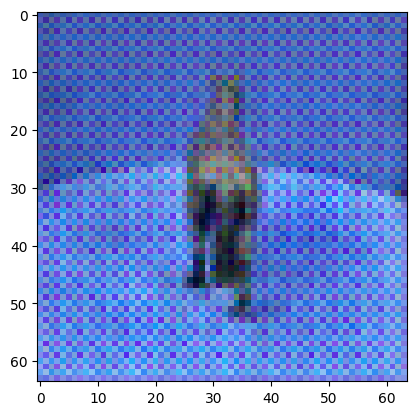

Epoch:  942


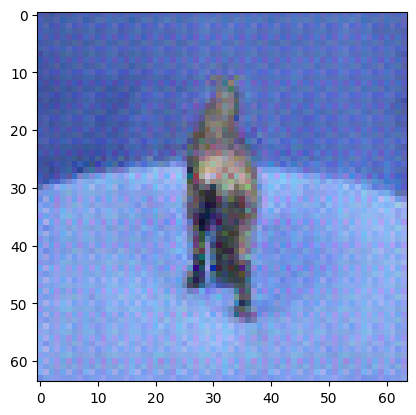

Epoch:  943


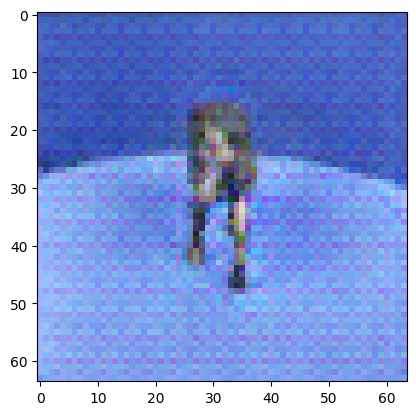

Epoch:  944


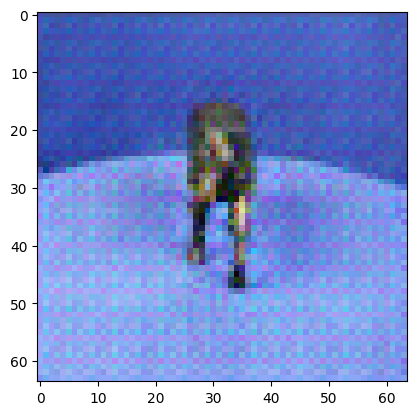

Epoch:  945


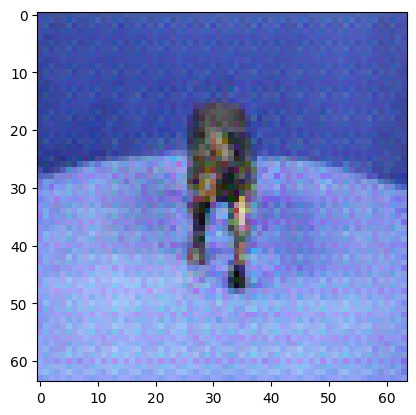

Epoch:  946


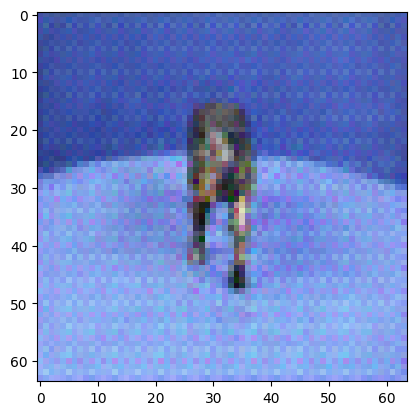

Epoch:  947


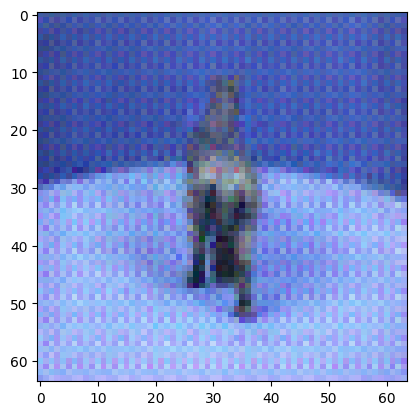

Epoch:  948


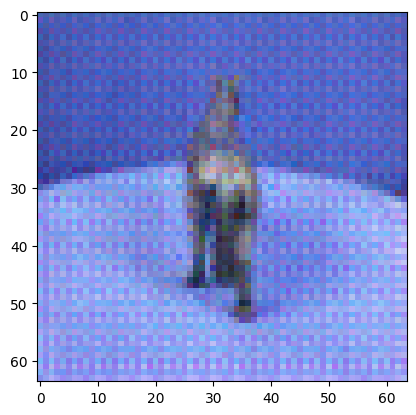

Epoch:  949


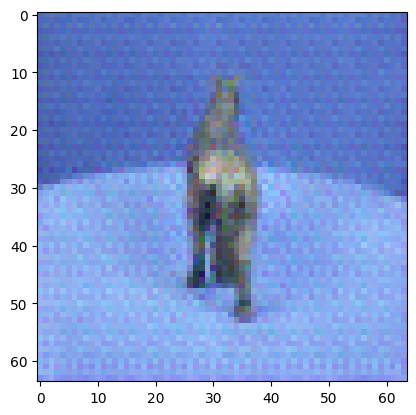

Epoch:  950


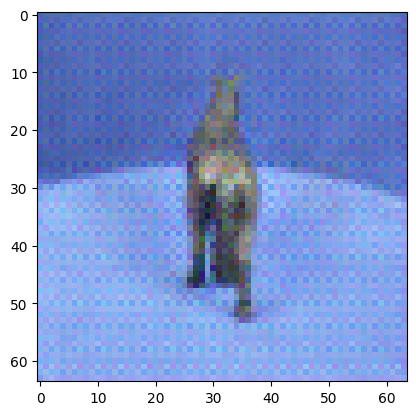

Epoch:  951


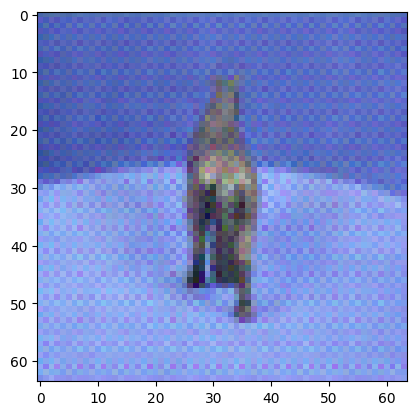

Epoch:  952


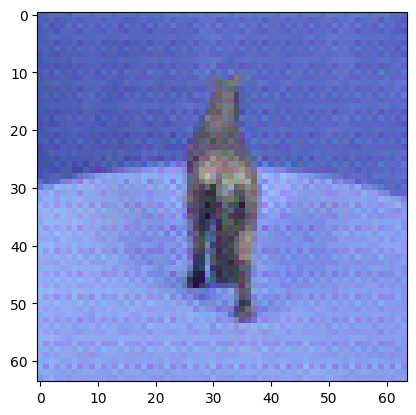

Epoch:  953


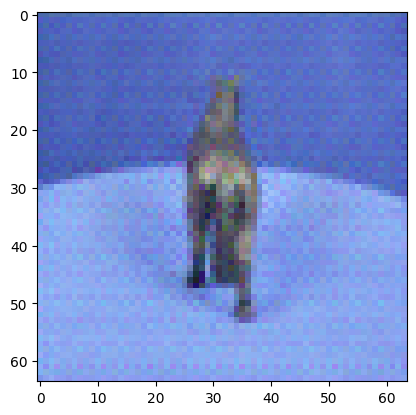

Epoch:  954


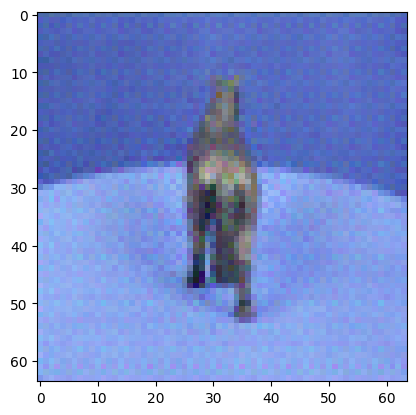

Epoch:  955


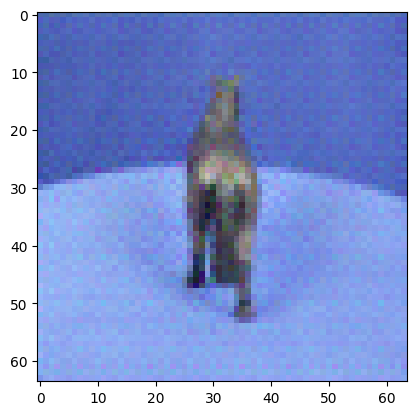

Epoch:  956


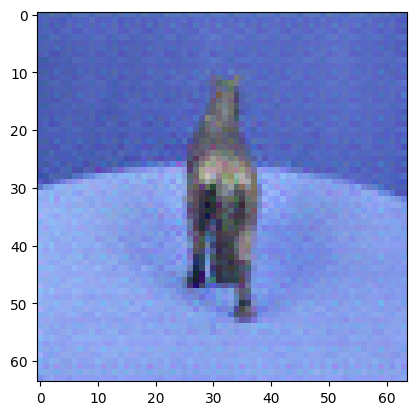

Epoch:  957


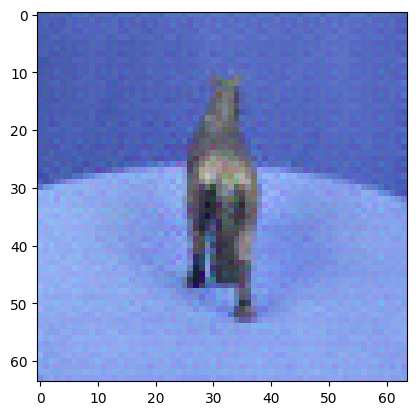

Epoch:  958


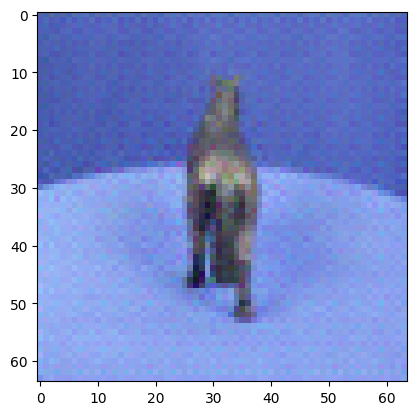

Epoch:  959


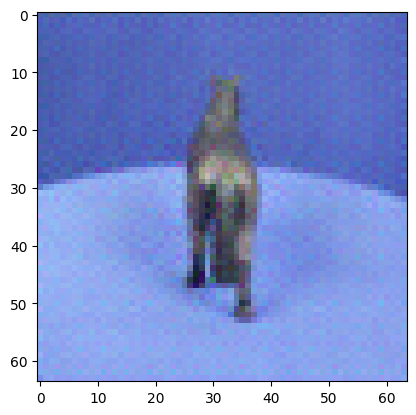

Epoch:  960


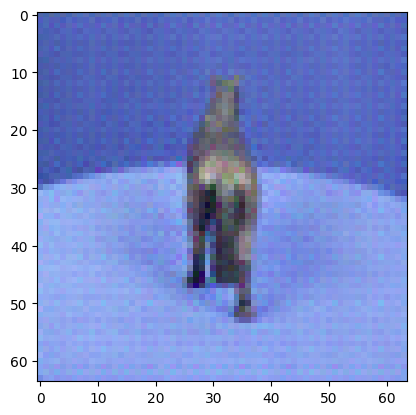

Epoch:  961


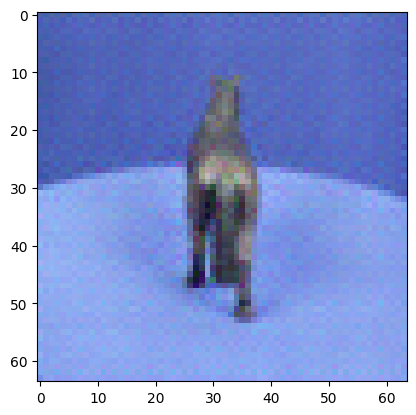

Epoch:  962


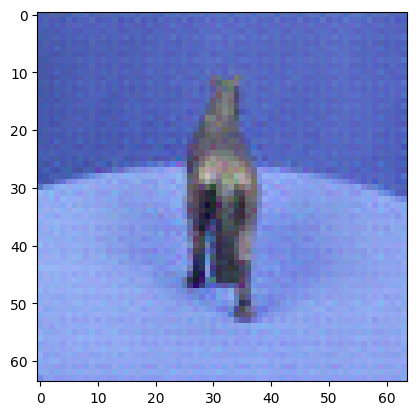

Epoch:  963


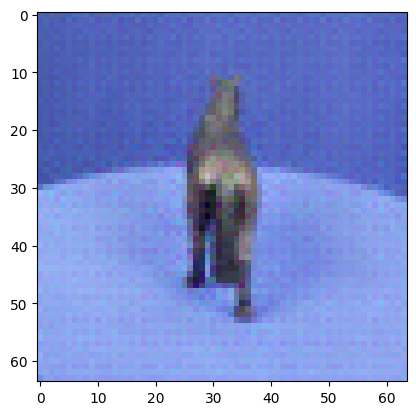

Epoch:  964


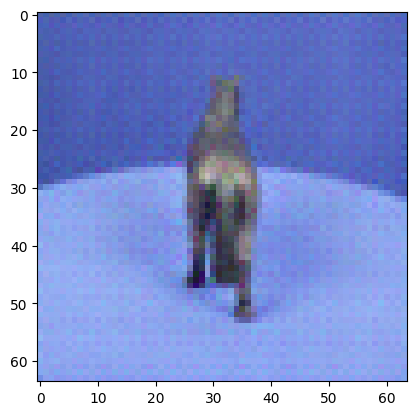

Epoch:  965


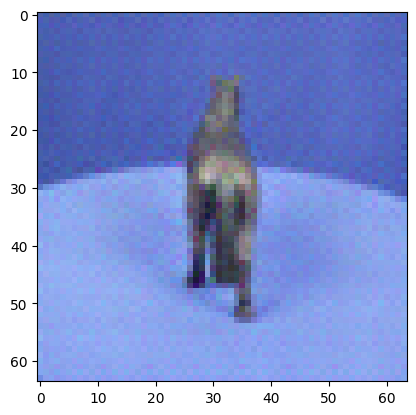

Epoch:  966


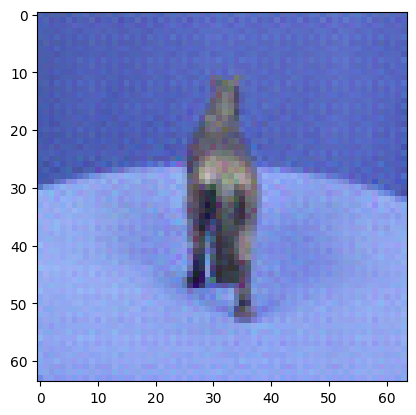

Epoch:  967


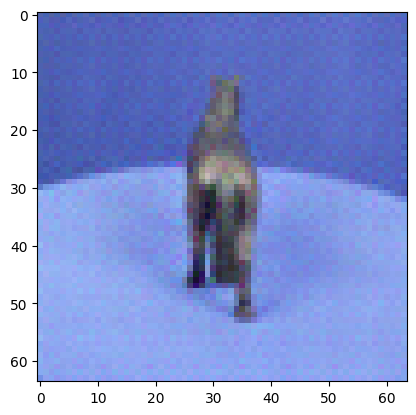

Epoch:  968


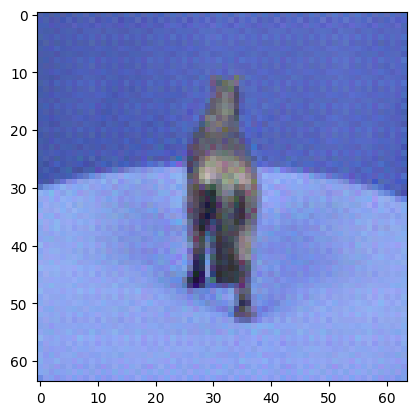

Epoch:  969


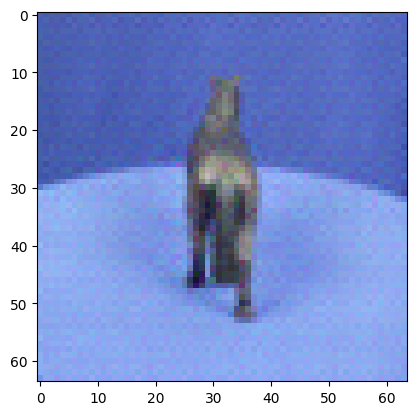

Epoch:  970


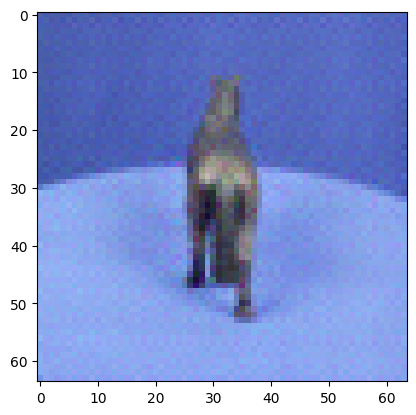

Epoch:  971


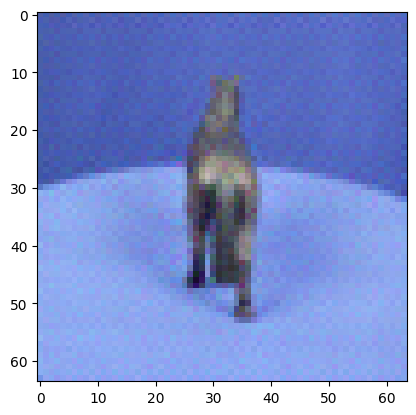

Epoch:  972


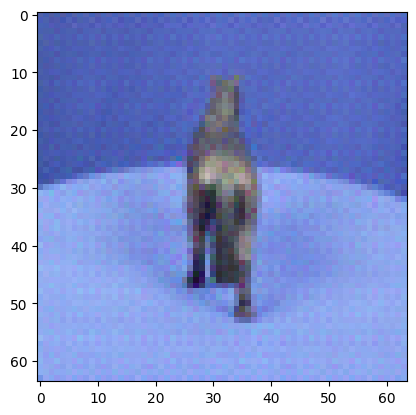

Epoch:  973


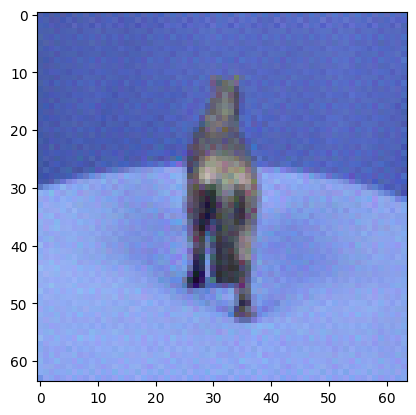

Epoch:  974


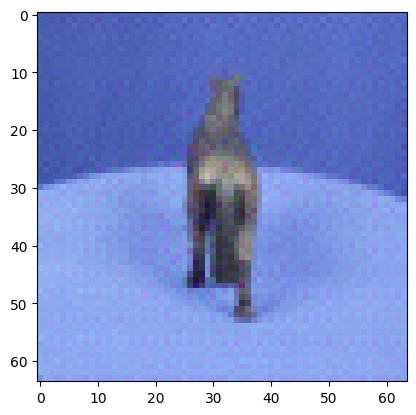

Epoch:  975


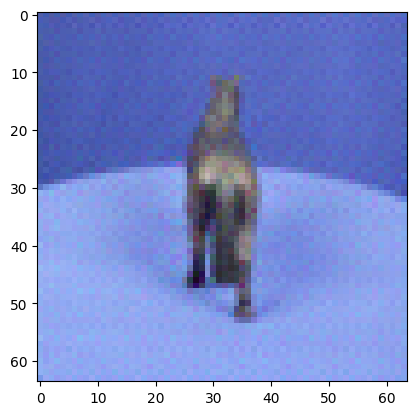

Epoch:  976


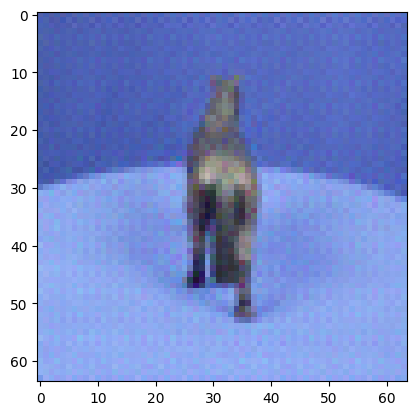

Epoch:  977


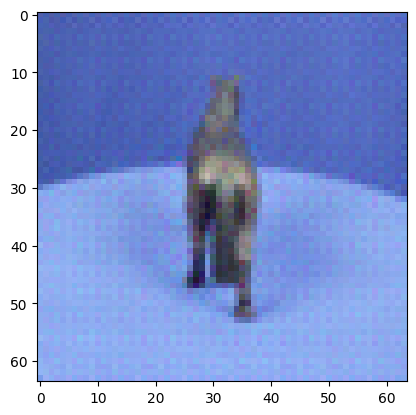

Epoch:  978


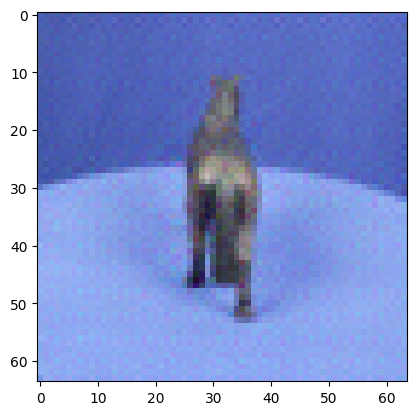

Epoch:  979


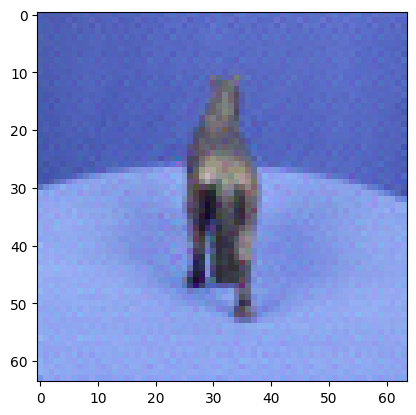

Epoch:  980


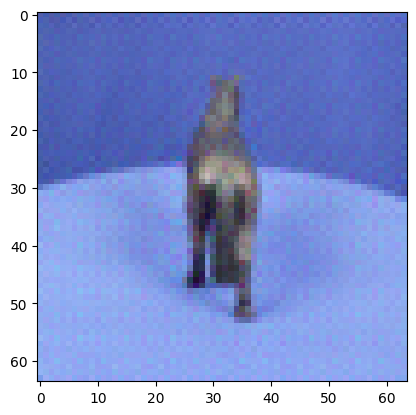

Epoch:  981


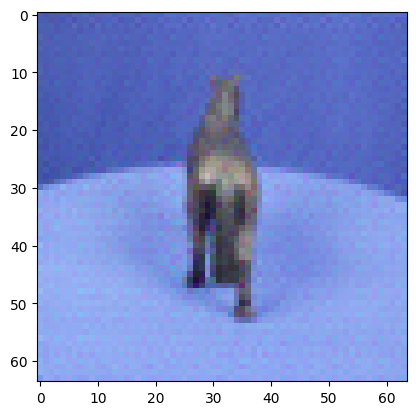

Epoch:  982


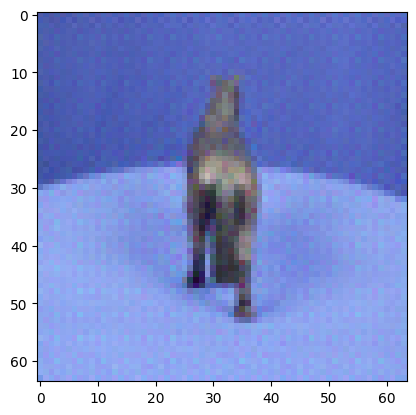

Epoch:  983


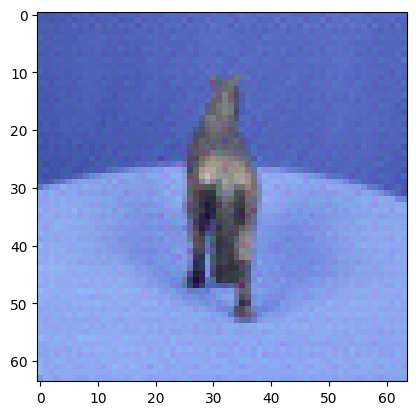

Epoch:  984


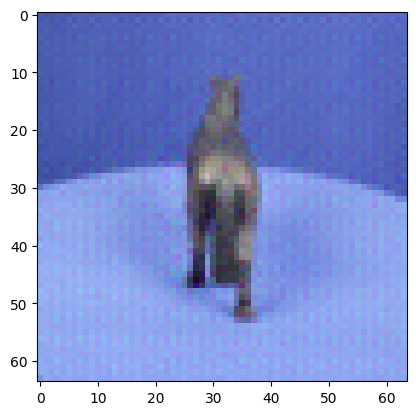

Epoch:  985


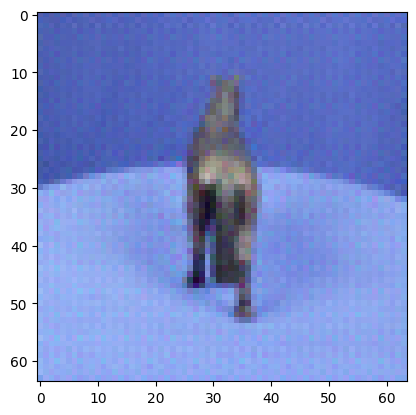

Epoch:  986


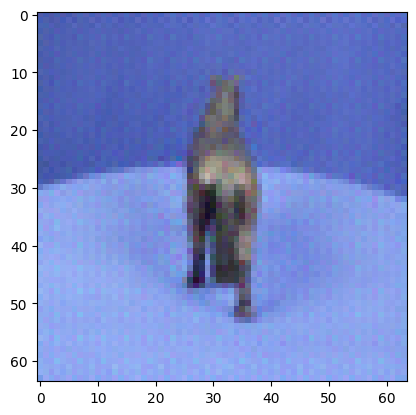

Epoch:  987


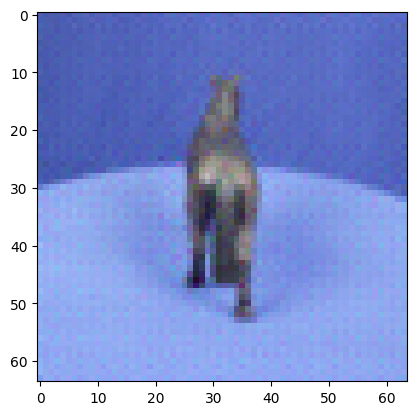

Epoch:  988


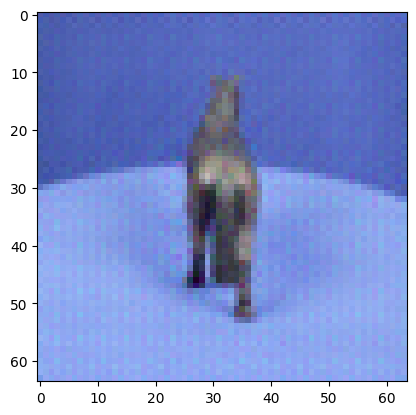

Epoch:  989


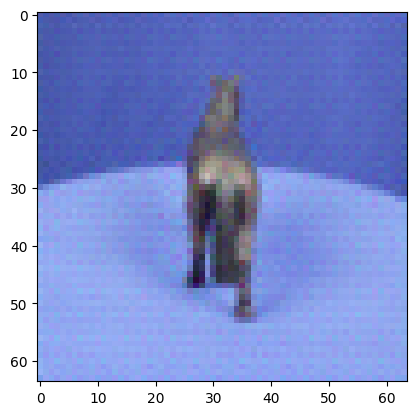

Epoch:  990


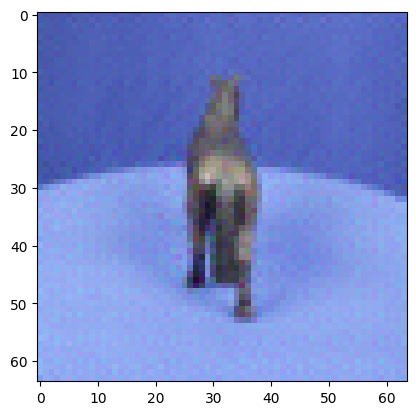

Epoch:  991


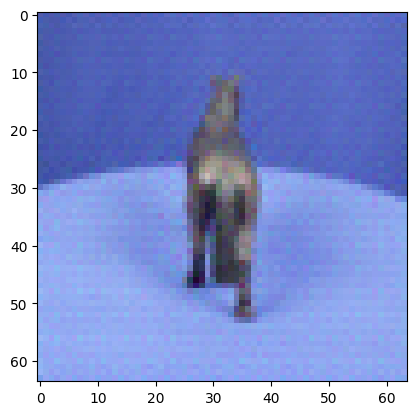

Epoch:  992


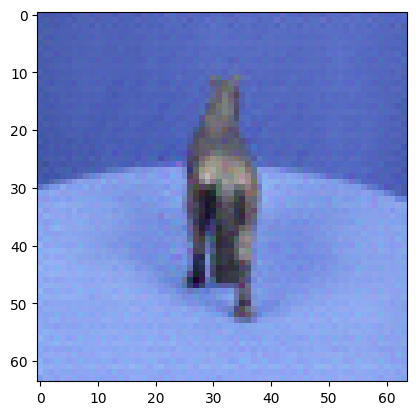

Epoch:  993


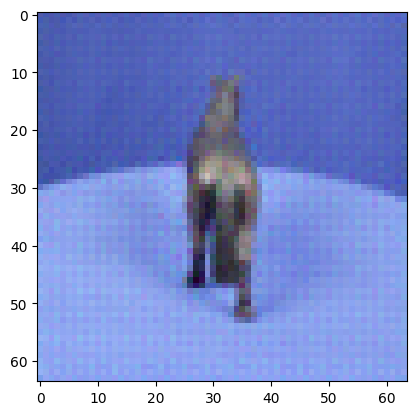

Epoch:  994


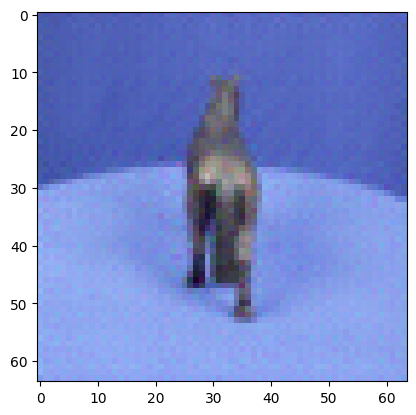

Epoch:  995


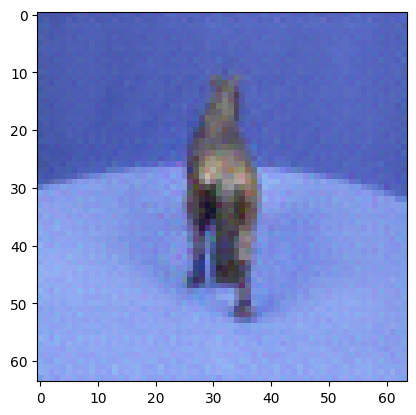

Epoch:  996


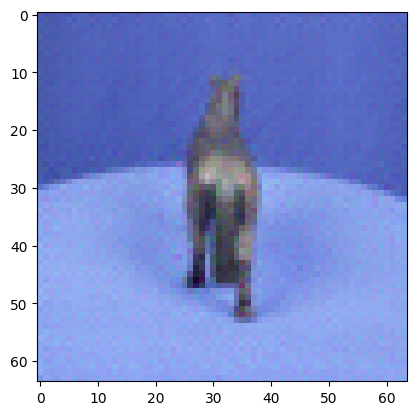

Epoch:  997


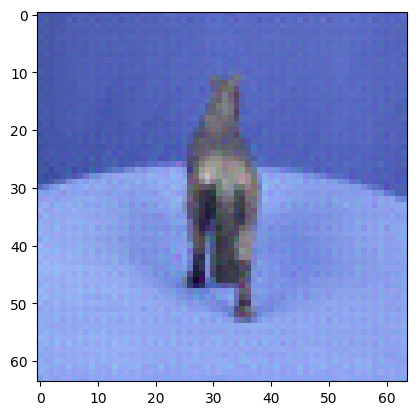

Epoch:  998


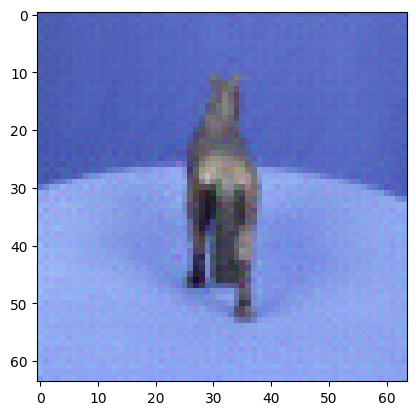

Epoch:  999


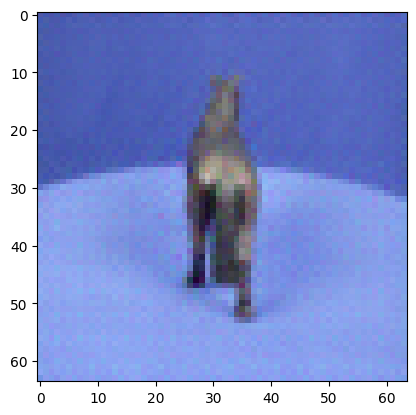

In [ ]:

from torchvision.utils import save_image
# generator.to(device)
# discriminator.to(device)
# Total number of epochs to train
d_losses=[]
g_losses=[]
num_test_samples = 4
# test_noise = noise(num_test_samples)
num_epochs = 1000
count=0
for epoch in range(num_epochs):
    print('Epoch: ', epoch)
    cout=count+1
    for n_batch, (real_batch,_) in enumerate(Horse_loader,0):
        real_batch=real_batch.to(device)
        N = real_batch.size(0)

        # 1. Train Discriminator

        ########### Train D ##################
            # Reset gradients
        d_optimizer.zero_grad()

        # 1.1 Train on Real Data
        prediction_real = discriminator(real_batch).view(-1)
        # Calculate error and backpropagate
        target_real=torch.ones(N,dtype=torch.float, device=device)
        error_real = loss(prediction_real,target_real)
        error_real.backward()

        # 1.2 Train on Fake Data
        # Generate fake data and detach
        # (so gradients are not calculated for generator)
        noise = torch.randn(N, 100,1,1)
        fake_data = generator(noise.to(device))
        prediction_fake = discriminator(fake_data.detach()).view(-1)

        # Calculate error and backpropagate
        target_fake=torch.zeros(N,dtype=torch.float, device=device)
        error_fake = loss(prediction_fake, target_fake)
        error_fake.backward()
        # total error of D
        err_D = error_real + error_fake
        # 1.3 Update weights with gradients
        d_optimizer.step()

        ############## Train G ##########
        # Reset gradients
        g_optimizer.zero_grad()
        # Sample noise and generate fake data
        prediction = discriminator(fake_data).view(-1)
        # Calculate error and backpropagate
        error = loss(prediction, target_real)
        error.backward()
        # Update weights with gradients
        g_optimizer.step()
        # Save the errors for later comparison
        d_losses.append(err_D.item())
        g_losses.append(error.item())
        # Display Progress every few batches
        # Show generated images for epochs higher than 900
        if epoch > 900 and (n_batch) % 60 == 0:
          noise1=torch.randn(N, 100,1,1)
          img=generator(noise1.to(device))[0]
          img=img.cpu().detach().squeeze().permute(1,2,0).numpy()
          plt.imshow(img)
          plt.show()

## *Checking how the Generator is training with Noise*
This code generates and displays images using a GAN generator. It initializes a fixed noise vector (fixed_noise) and generates images at regular intervals using a changing noise vector (noise). The generated images are then displayed using Matplotlib. The commented-out code suggests an intention to save the images to a directory. The loop runs for 50,000 iterations, updating the noise vector every 50 iterations and displaying images every 500 iterations. The displayed images showcase the evolving output of the GAN generator during training. The code appears to be a visual inspection of the generator's progress.

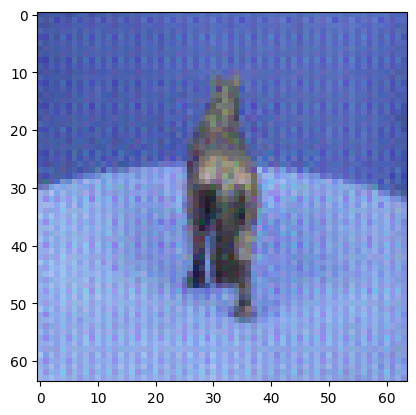

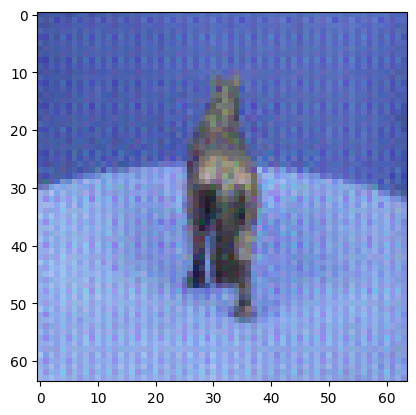

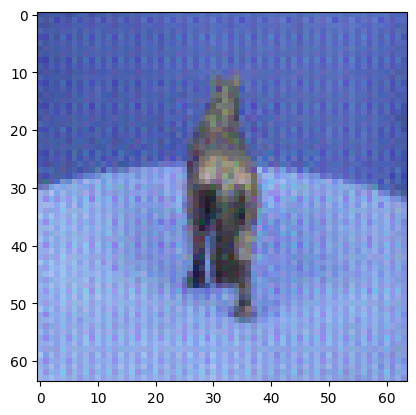

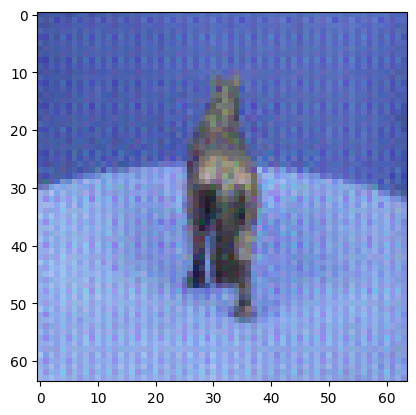

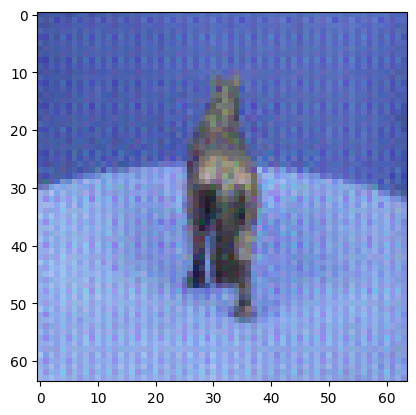

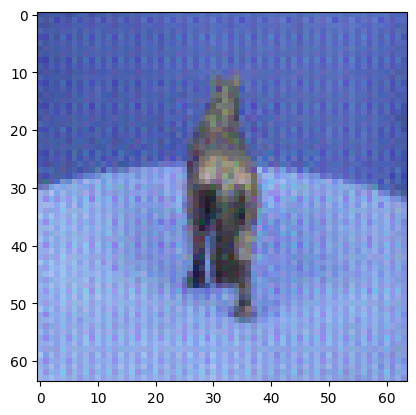

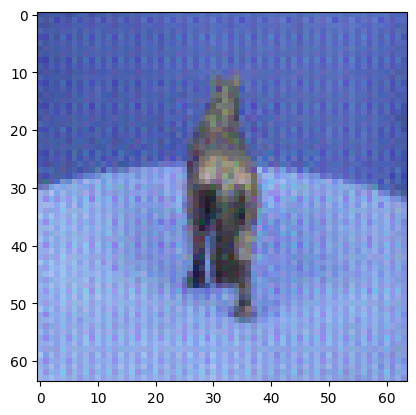

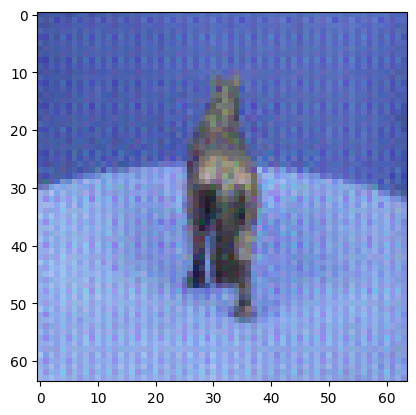

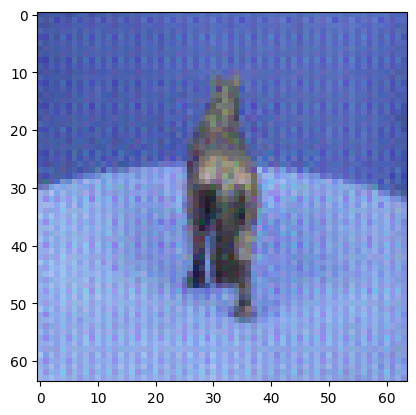

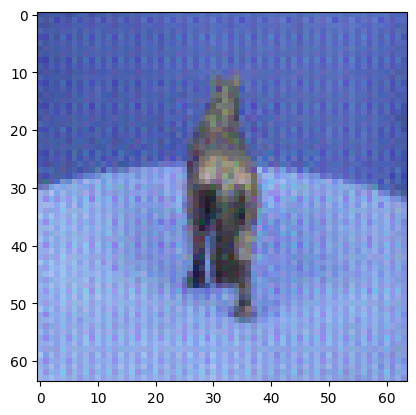

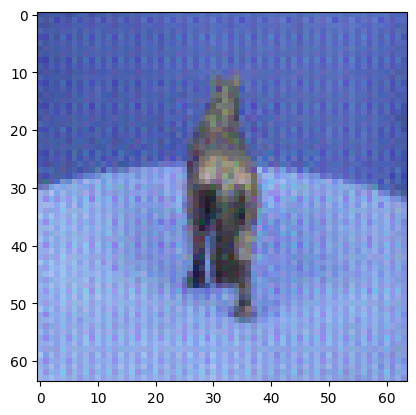

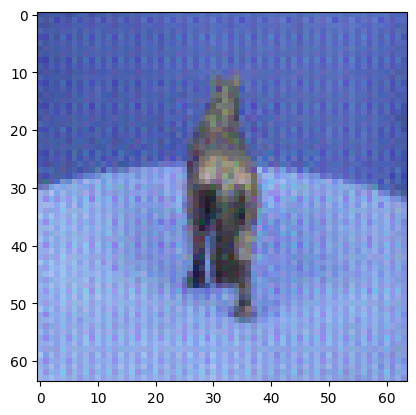

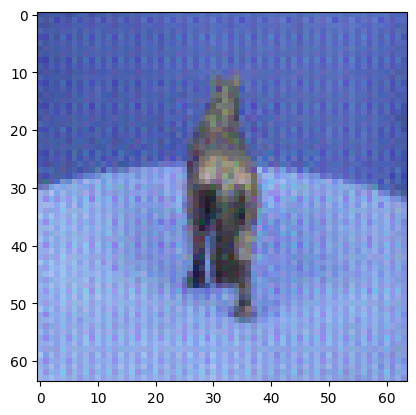

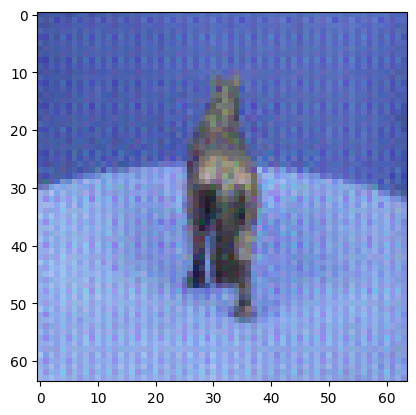

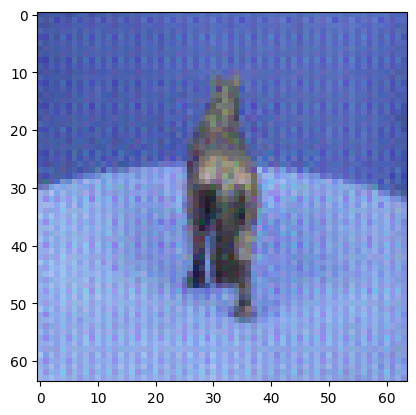

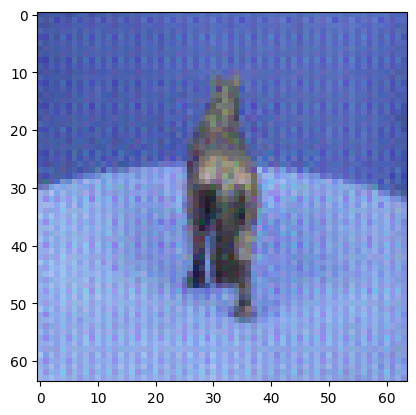

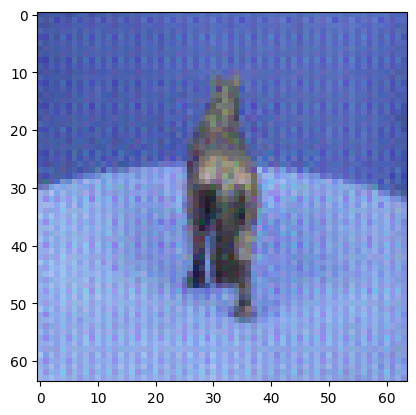

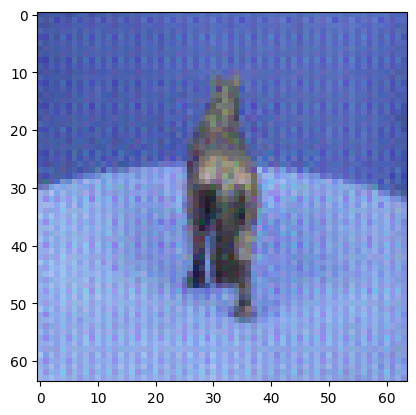

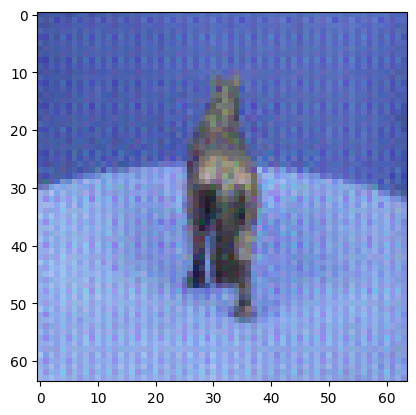

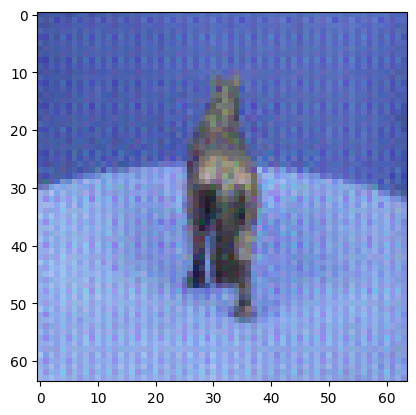

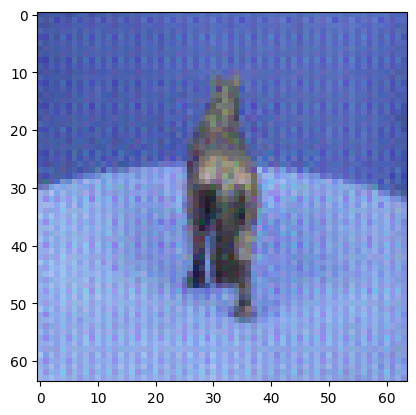

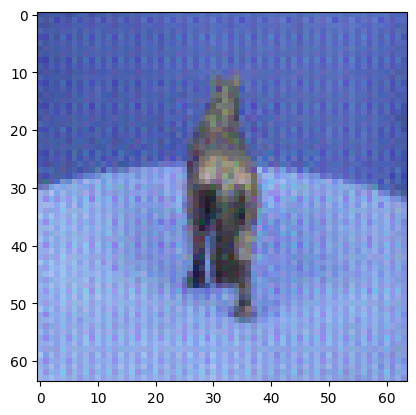

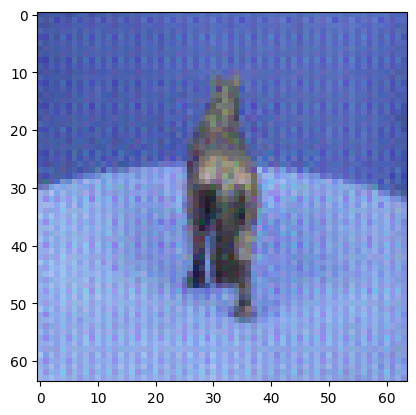

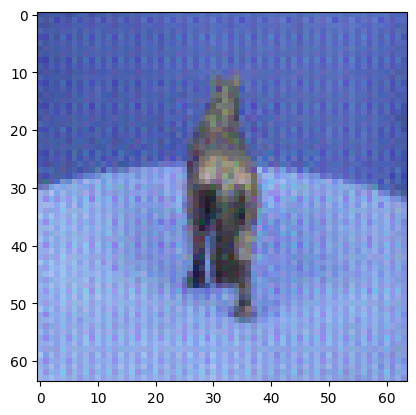

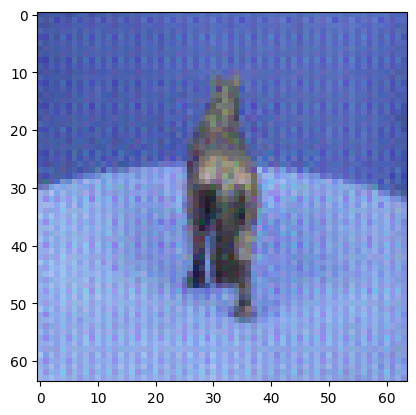

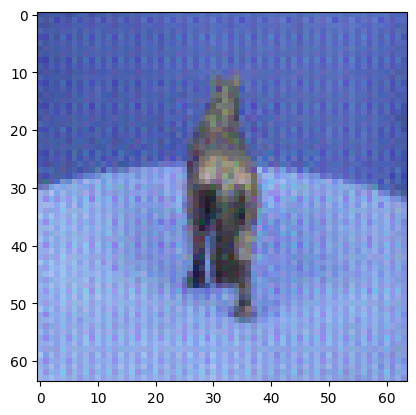

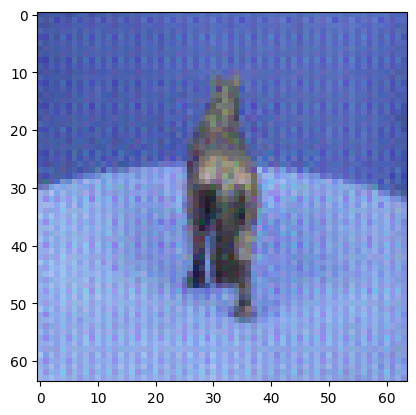

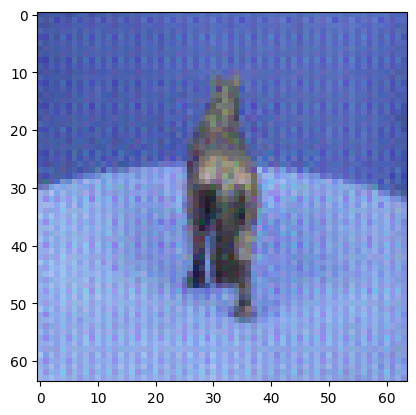

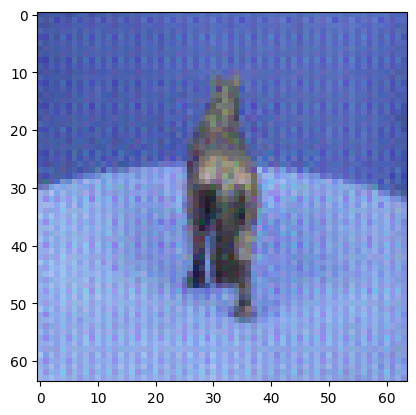

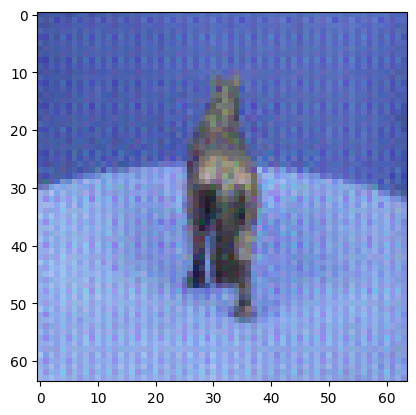

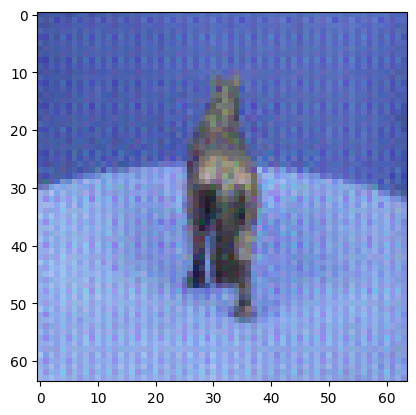

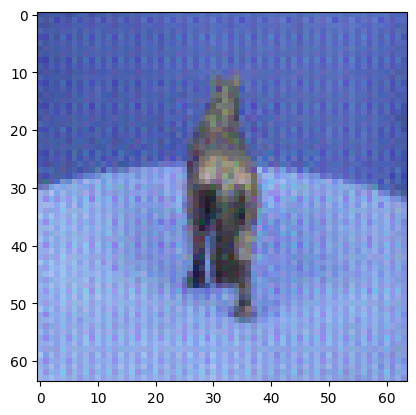

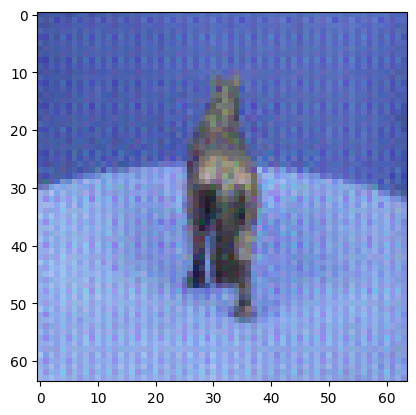

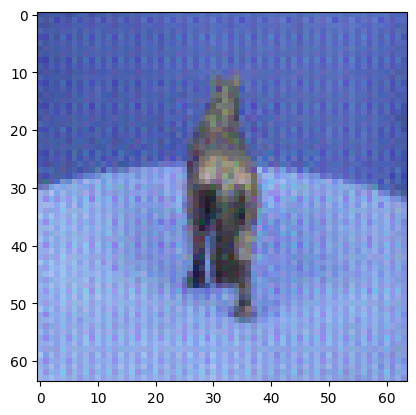

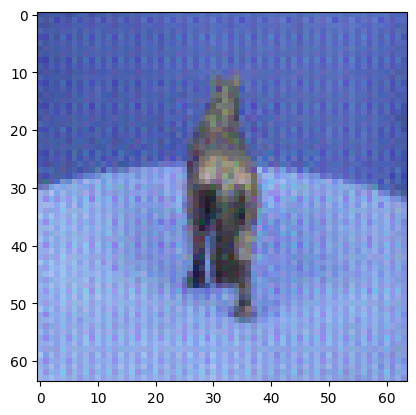

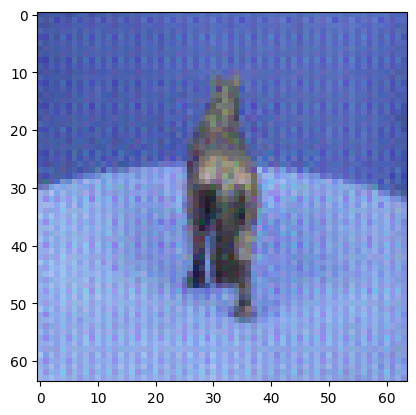

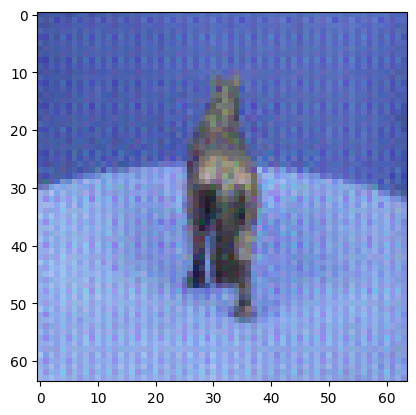

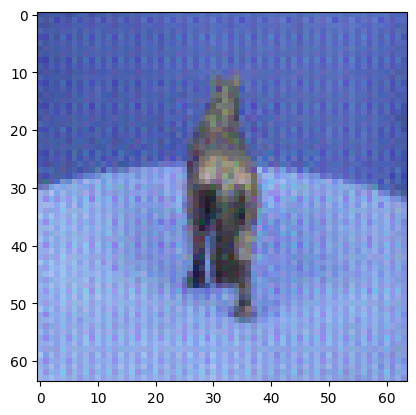

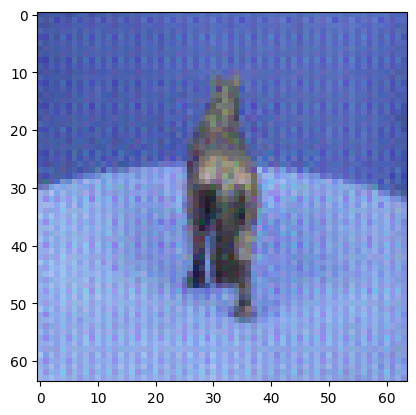

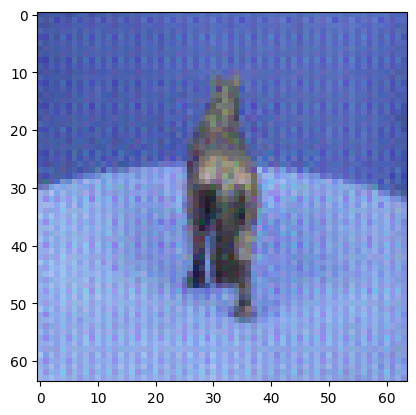

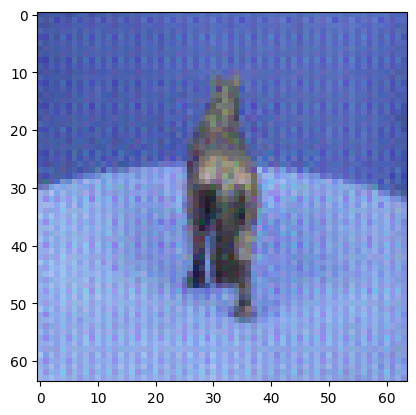

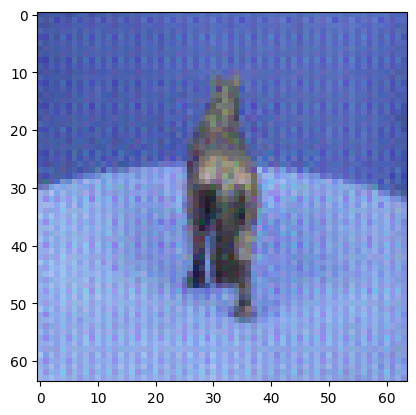

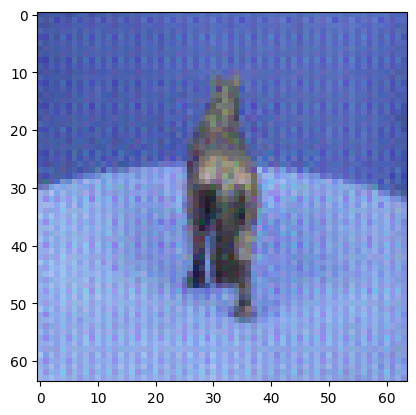

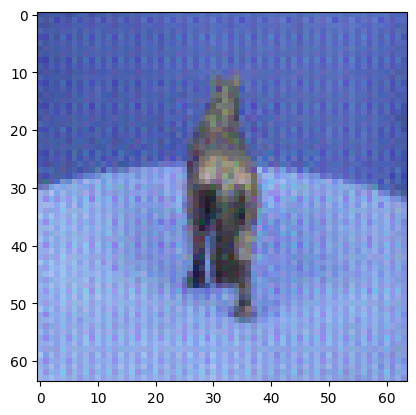

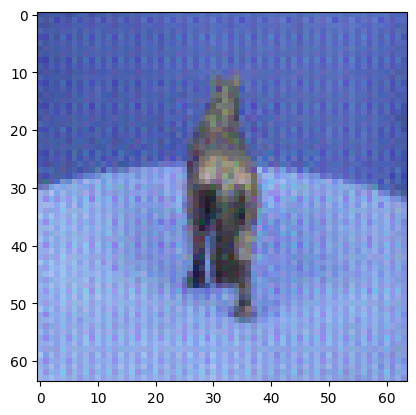

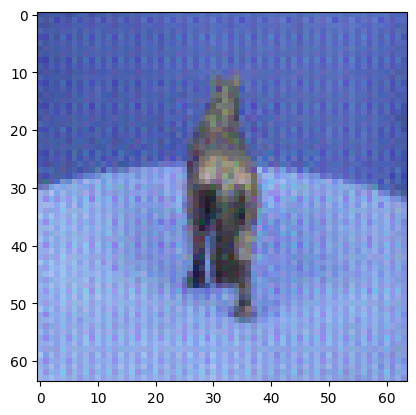

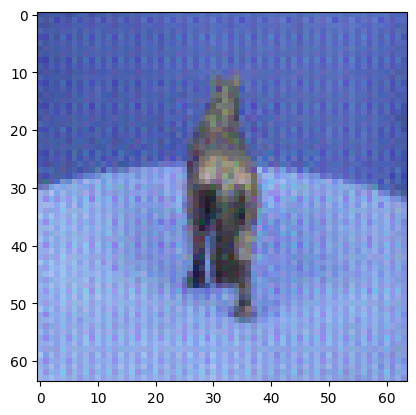

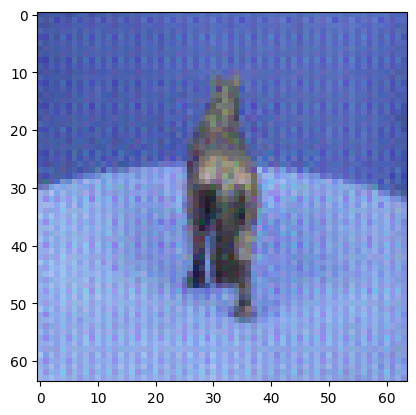

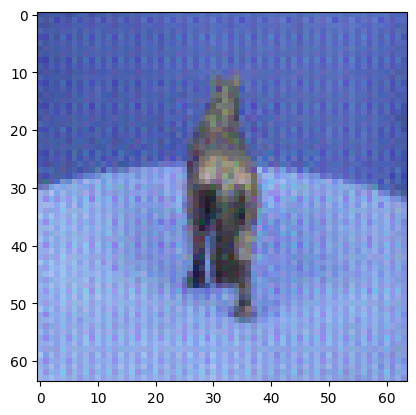

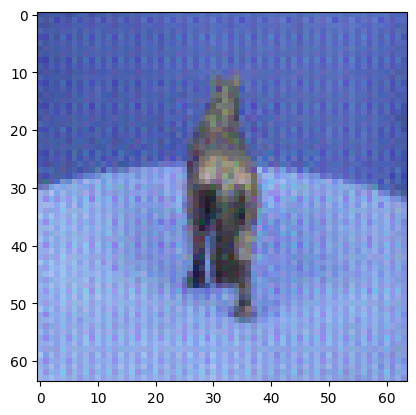

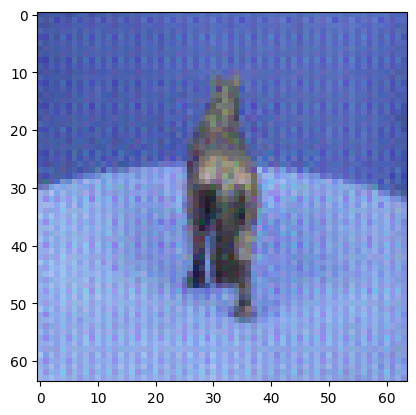

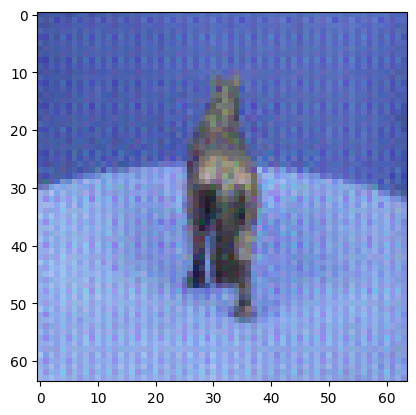

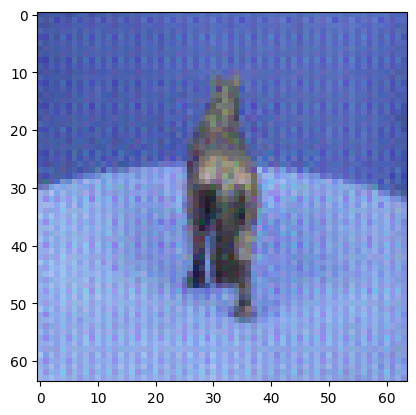

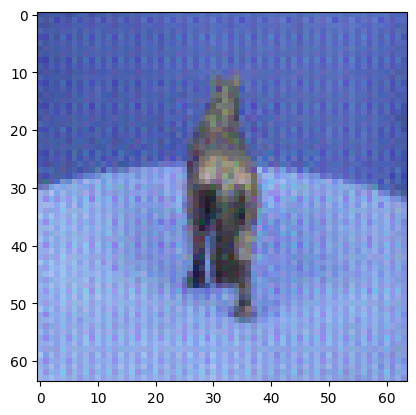

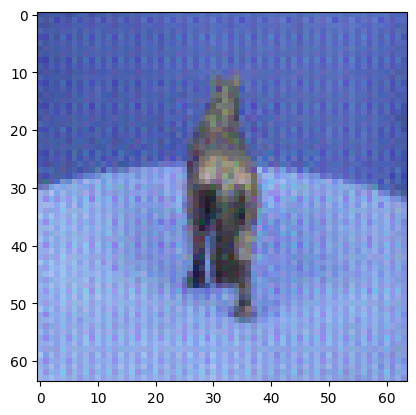

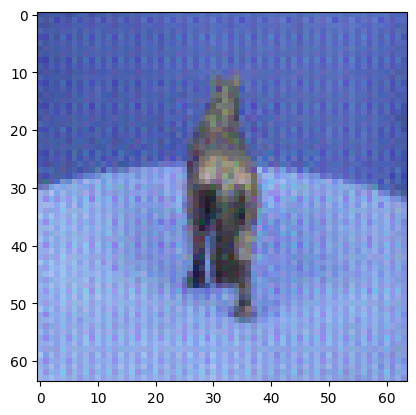

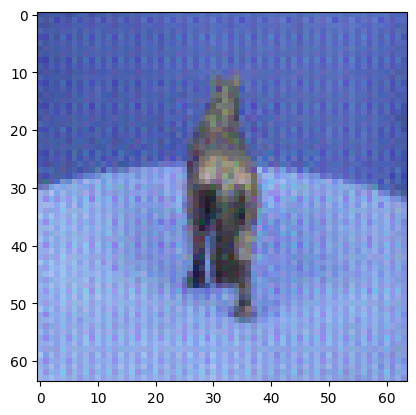

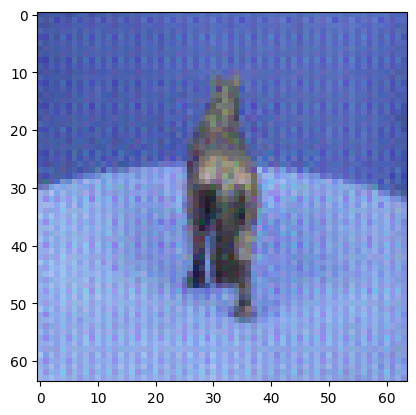

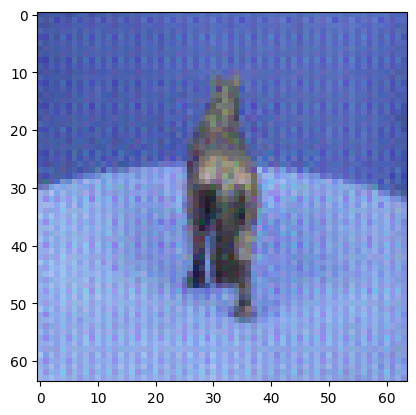

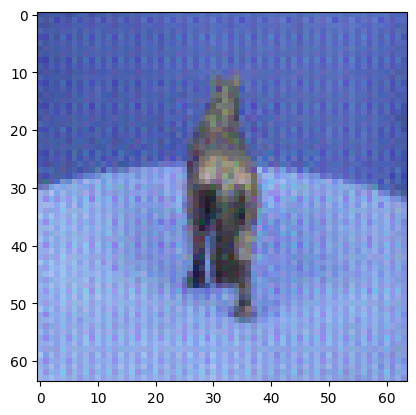

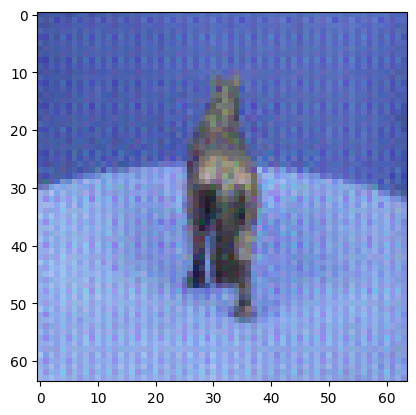

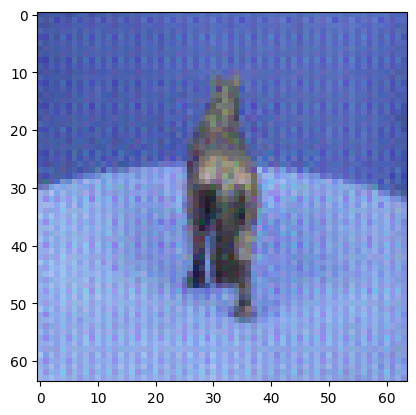

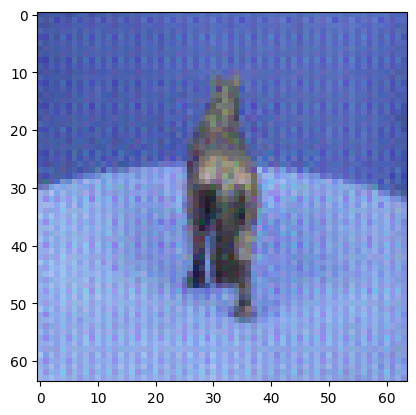

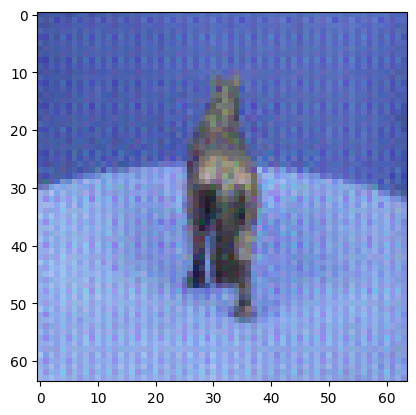

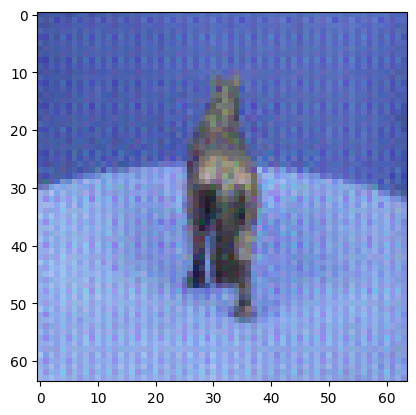

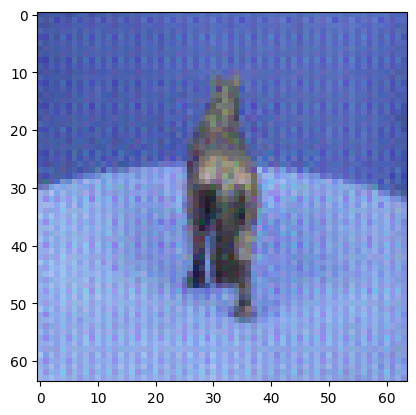

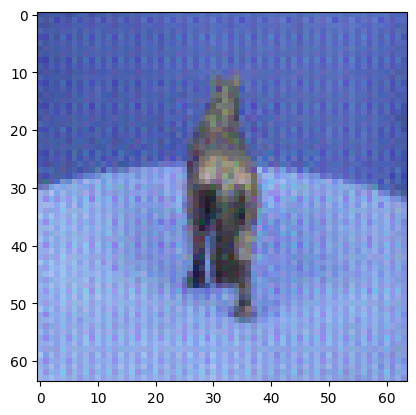

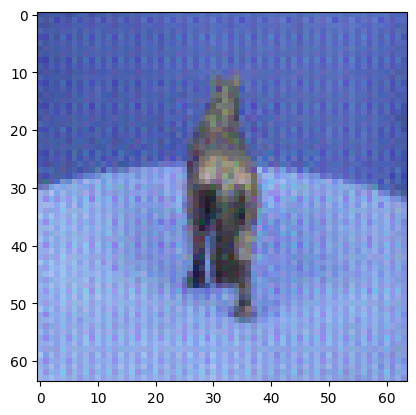

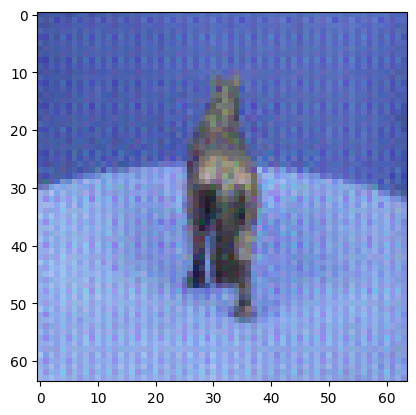

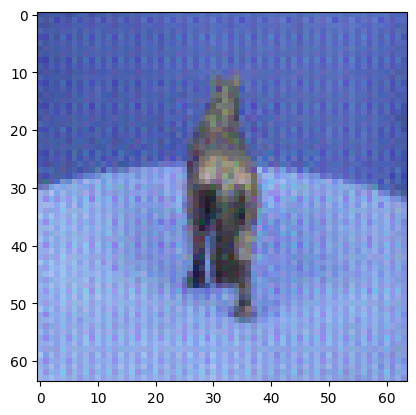

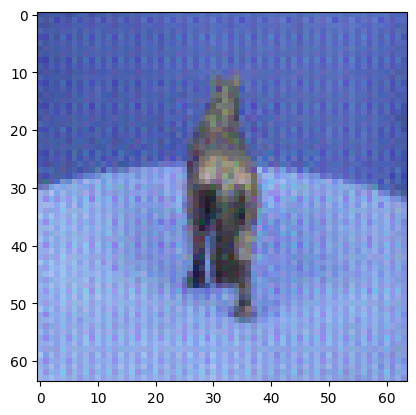

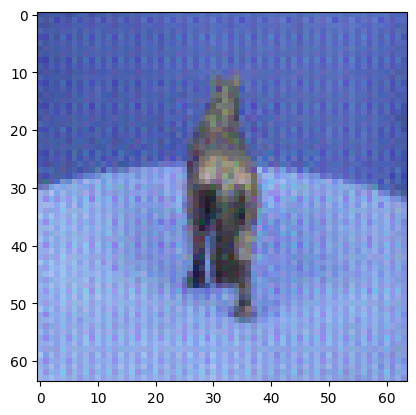

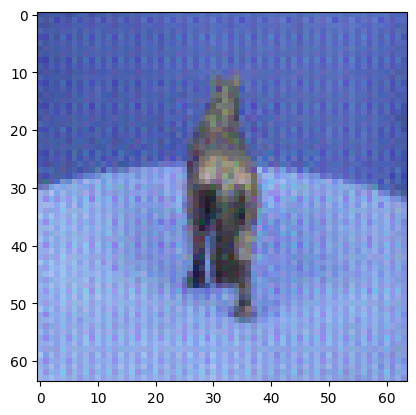

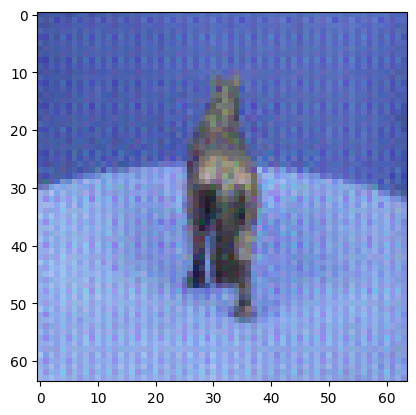

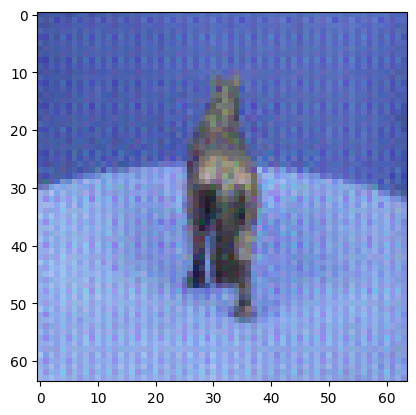

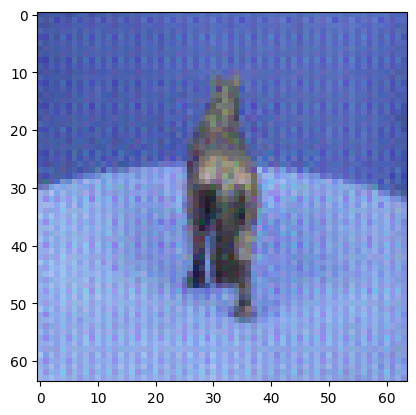

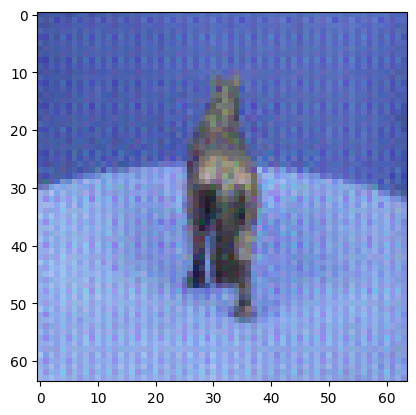

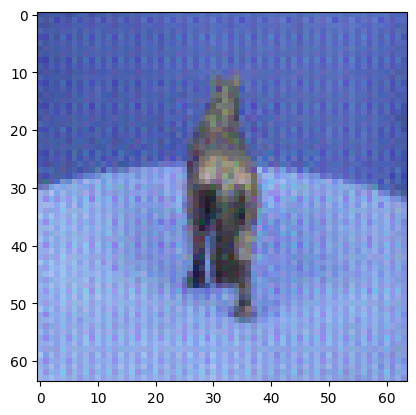

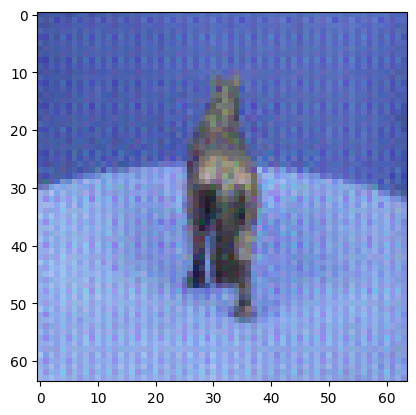

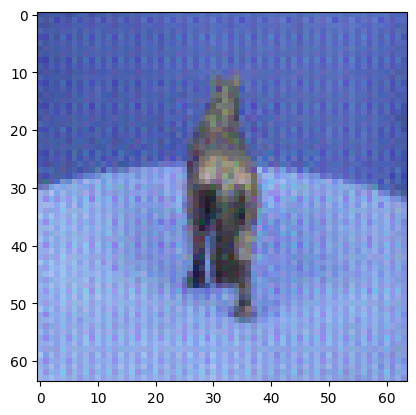

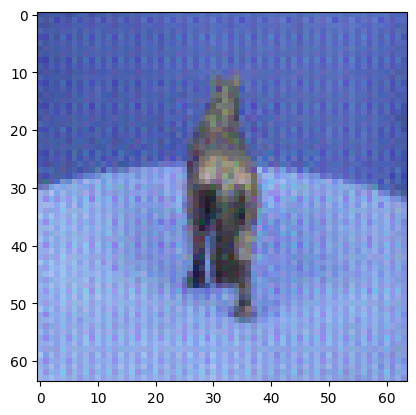

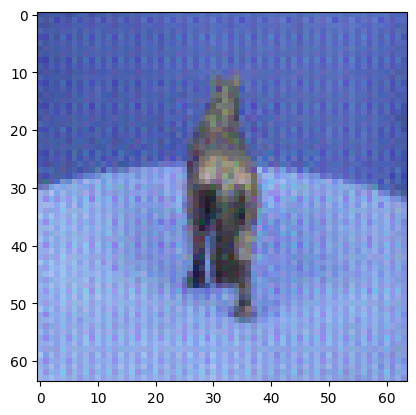

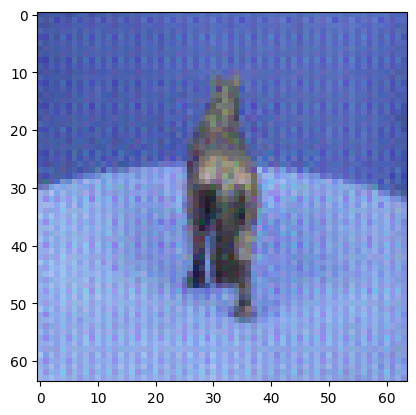

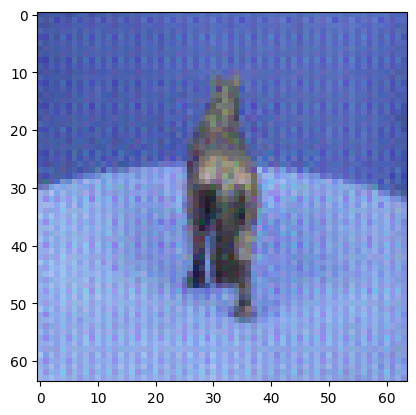

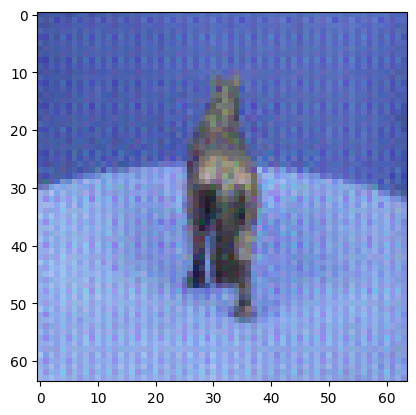

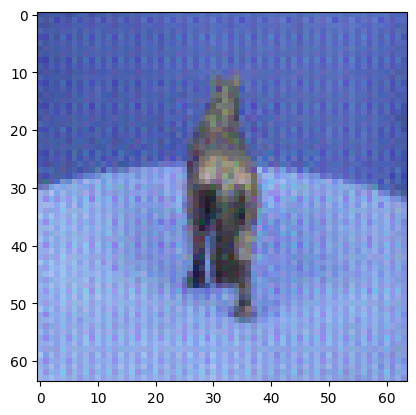

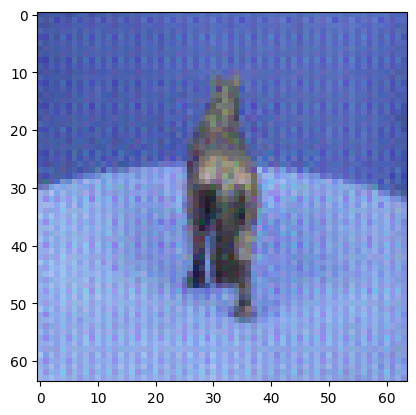

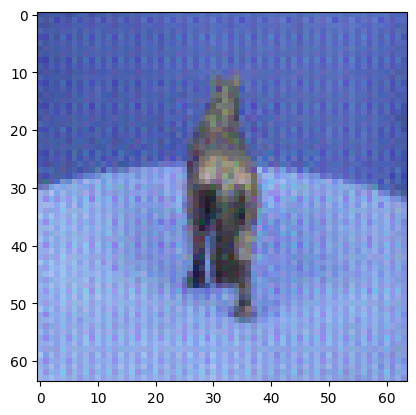

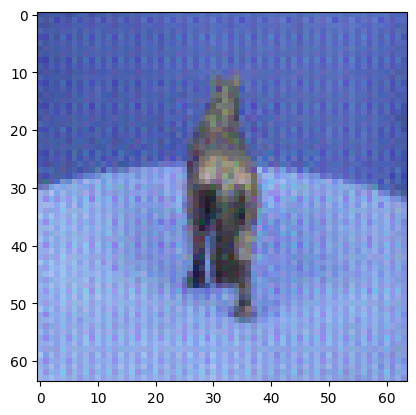

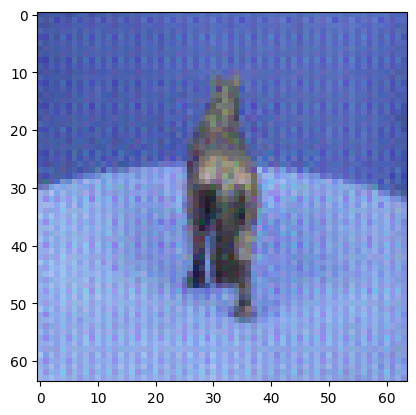

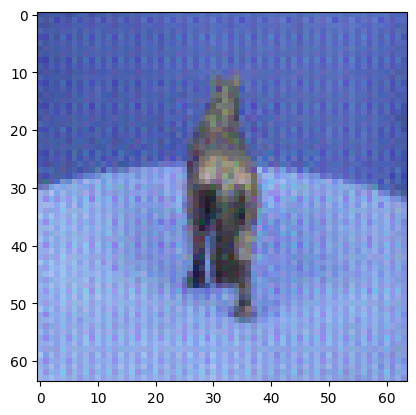

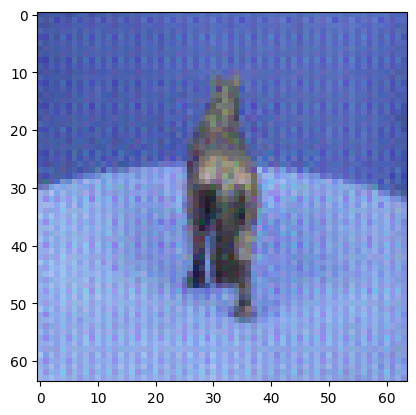

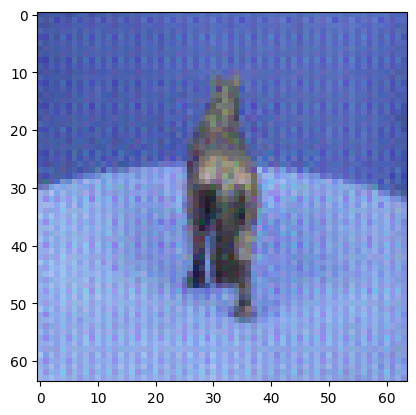

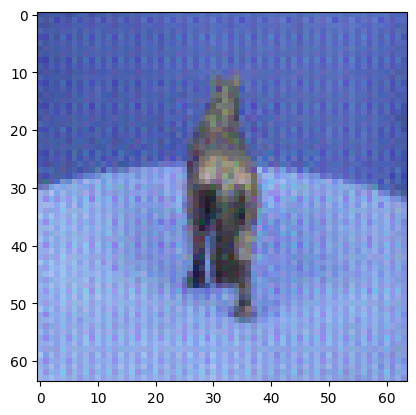

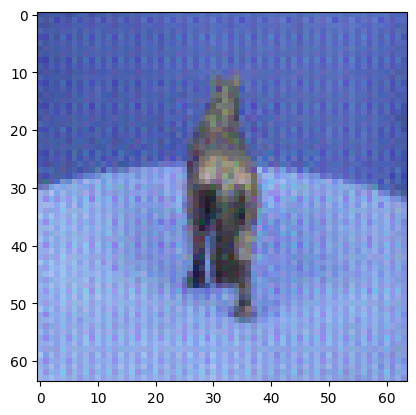

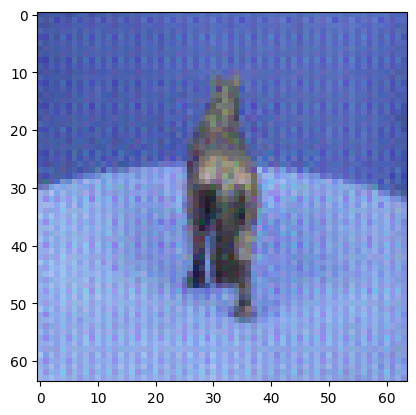

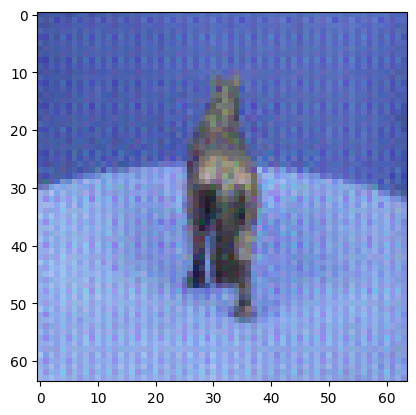

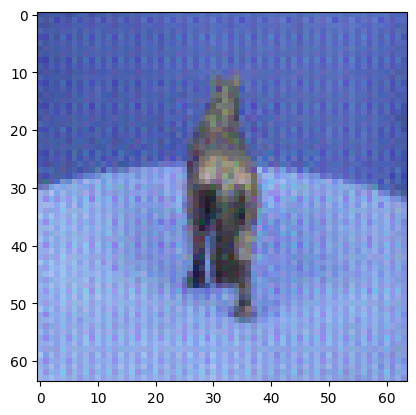

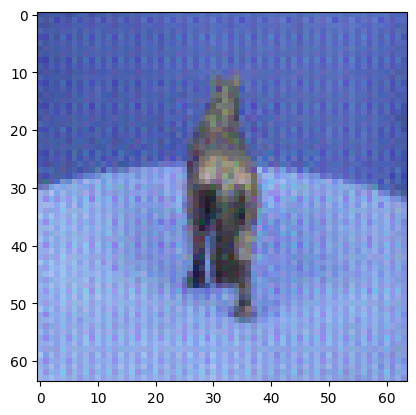

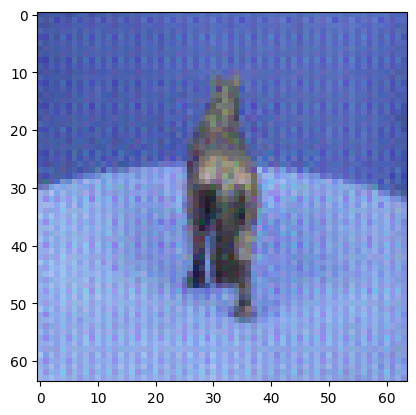

In [ ]:

from torchvision.utils import save_image
torch.manual_seed(50)

# Generate a fixed noise vector for all images
fixed_noise = torch.randn(1, 10, 1, 1, device=device)
c=100
for i in range(50000):
    if i % 50 == 49:
        # Change the noise vector after every 50 iterations
        noise = torch.randn(1, 100, 1, 1, device=device)

    # Generate image with the noise vector
    genImg = generator(noise.to(device))[0]
    if i % 500 == 499:
        # save_image(genImg, f'/content/drive/MyDrive/GANData/Train/Cow/{c}.png' )
        # c=c+1
        genImg = genImg.cpu().detach().squeeze().permute(1, 2, 0).numpy()
        plt.imshow(img)
        plt.show()

## *Plotting Loss in Discriminator*

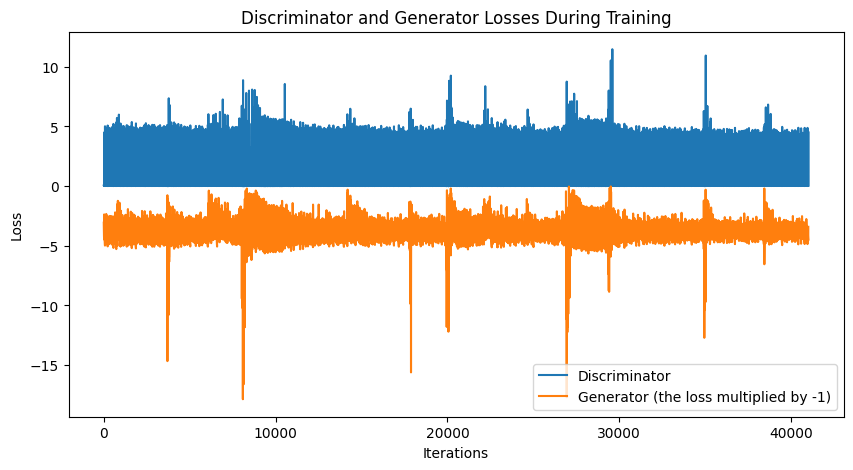

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Discriminator and Generator Losses During Training")
plt.plot(d_losses, label="Discriminator")
plt.plot([-loss for loss in g_losses], label="Generator (the loss multiplied by -1)")  # Multiply generator losses by (-1)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()